In [1]:
from tools import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
import random, math, copy

In [2]:
itemNum=25 #物品数目
Bin=[40,15] #箱子宽度与高度
ran=list(range(itemNum))

# C2-P1

In [3]:
# P1 = [
#     [11, 3],
#     [13, 3],
#     [9, 2],
#     [7, 2],
#     [9, 3],
#     [7, 3],
#     [11, 2],
#     [13, 2],
#     [11, 4],
#     [13, 4],
#     [3, 5],
#     [11, 2],
#     [2, 2],
#     [11, 3],
#     [2, 3],
#     [5, 4],
#     [6, 4],
#     [12, 2],
#     [1, 2],
#     [3, 5],
#     [13, 5],
#     [12, 4],
#     [1, 4],
#     [5, 2],
#     [6, 2]
# ]

# AllItem = np.array(P1)

# print(AllItem)


[[11  3]
 [13  3]
 [ 9  2]
 [ 7  2]
 [ 9  3]
 [ 7  3]
 [11  2]
 [13  2]
 [11  4]
 [13  4]
 [ 3  5]
 [11  2]
 [ 2  2]
 [11  3]
 [ 2  3]
 [ 5  4]
 [ 6  4]
 [12  2]
 [ 1  2]
 [ 3  5]
 [13  5]
 [12  4]
 [ 1  4]
 [ 5  2]
 [ 6  2]]


# C2-P2

In [5]:
# P2 = [
#     [11, 2],
#     [2, 3],
#     [10, 7],
#     [8, 4],
#     [9, 5],
#     [7, 2],
#     [4, 1],
#     [6, 1],
#     [4, 5],
#     [8, 3],
#     [1, 3],
#     [5, 5],
#     [3, 1],
#     [12, 4],
#     [6, 2],
#     [2, 4],
#     [11, 4],
#     [10, 2],
#     [3, 2],
#     [11, 2],
#     [3, 4],
#     [26, 4],
#     [8, 4],
#     [3, 2],
#     [6, 2]
# ]

# AllItem = np.array(P2)

# print(AllItem)

[[11  2]
 [ 2  3]
 [10  7]
 [ 8  4]
 [ 9  5]
 [ 7  2]
 [ 4  1]
 [ 6  1]
 [ 4  5]
 [ 8  3]
 [ 1  3]
 [ 5  5]
 [ 3  1]
 [12  4]
 [ 6  2]
 [ 2  4]
 [11  4]
 [10  2]
 [ 3  2]
 [11  2]
 [ 3  4]
 [26  4]
 [ 8  4]
 [ 3  2]
 [ 6  2]]


# C2-P3

In [3]:
P3 = [
    [12, 7],
    [7, 7],
    [7, 1],
    [5, 1],
    [3, 2],
    [6, 2],
    [7, 2],
    [5, 2],
    [3, 1],
    [6, 1],
    [12, 6],
    [9, 6],
    [12, 2],
    [7, 2],
    [10, 3],
    [4, 1],
    [5, 1],
    [16, 3],
    [5, 3],
    [11, 2],
    [3, 2],
    [10, 3],
    [9, 3],
    [16, 3],
    [5, 3]
]

AllItem = np.array(P3)

print(AllItem)

[[12  7]
 [ 7  7]
 [ 7  1]
 [ 5  1]
 [ 3  2]
 [ 6  2]
 [ 7  2]
 [ 5  2]
 [ 3  1]
 [ 6  1]
 [12  6]
 [ 9  6]
 [12  2]
 [ 7  2]
 [10  3]
 [ 4  1]
 [ 5  1]
 [16  3]
 [ 5  3]
 [11  2]
 [ 3  2]
 [10  3]
 [ 9  3]
 [16  3]
 [ 5  3]]


# Bottom-Left

utilisation: 0.8166666666666667


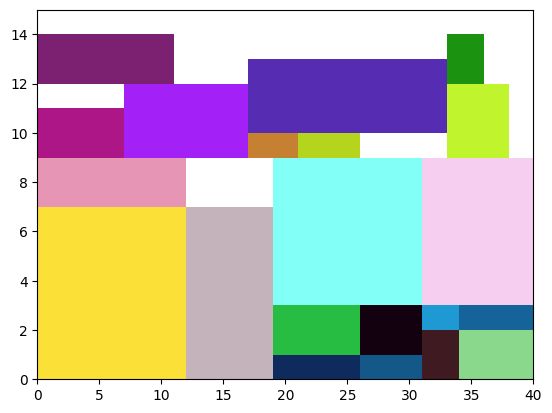

utilisation: 0.2


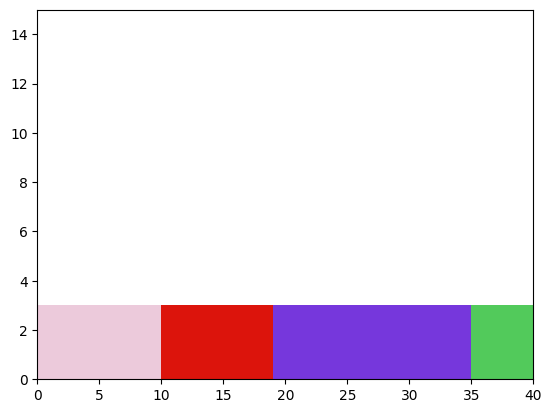

Average utilisation: 0.5083333333333333
Running time: 0.3000013828277588 seconds


In [6]:
def bottom_left(itemNum, AllItem, Bin):
    ran = list(range(itemNum))

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # start packing
    #print(list(flagItem).count(0))
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  #The starting points are all at the top right corner of the bin.
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) #If overlap flagOL=1; vice versa flagOL=0
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) #Update the coordinates of the top-right corner vertex of the item after moving it down and left from its current position to its final position.
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) # Record the rectangle that fits into the box [ID,width,height].
                        flagItem[ran[j]]=1

            #utilisation
            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            #visualisation
            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))

# BL(bottom-left) Sorted by height

utilisation: 0.89


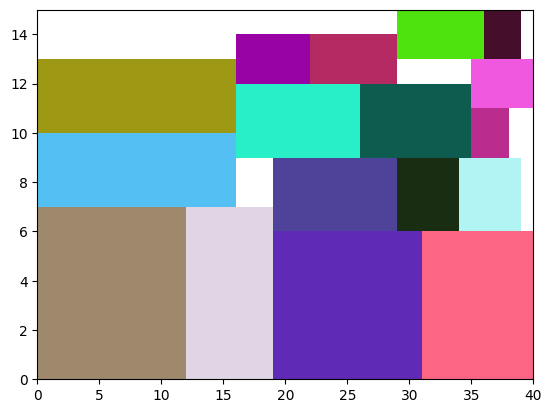

utilisation: 0.12666666666666668


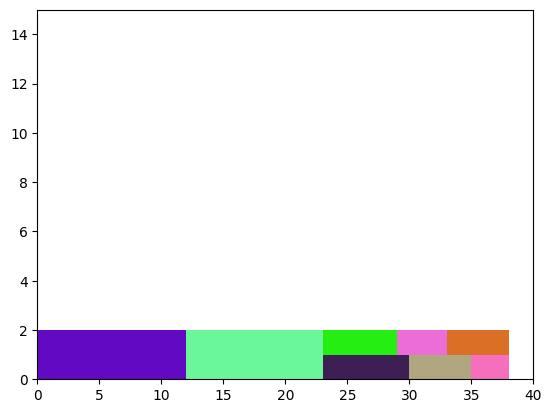

Average utilisation: 0.5083333333333333
Running time: 0.25300073623657227 seconds


In [9]:
def bottom_left_sorted(itemNum, AllItem, Bin):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # Start packing.
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) 
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) 
                        flagItem[ran[j]]=1

            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_sorted(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))
        

# Bottom-left-fill (BLF) algorithm

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

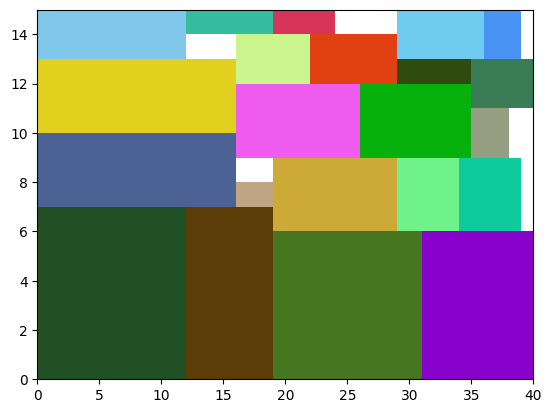

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

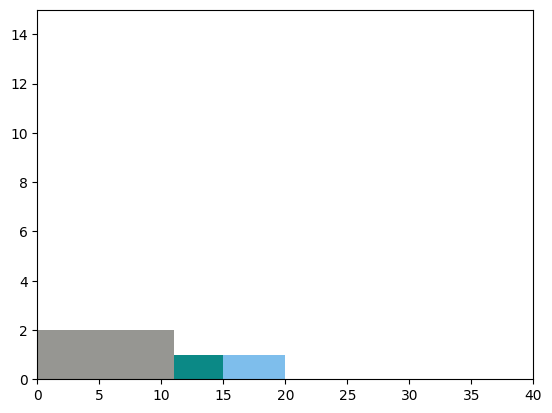

Average utilisation: 0.5083333333333333
Running time: 0.24402308464050293 seconds


In [12]:
bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)  # Initially a 0 matrix, representing an empty bin
def find_largest_blank_region(bin_matrix):
    rows, cols = bin_matrix.shape
    max_width, max_height, max_area = 0, 0, 0
    start_row, start_col = 0, 0

    for r in range(rows):
        for c in range(cols):
            if bin_matrix[r, c] == 0:
                width, height = 0, 0
                while c + width < cols and bin_matrix[r, c + width] == 0:
                    width += 1
                while r + height < rows and bin_matrix[r + height, c] == 0:
                    height += 1
                area = width * height

                if area > max_area:
                    max_width, max_height, max_area = width, height, area
                    start_row, start_col = r, c

    return start_row, start_col, max_width, max_height

def bottom_left_fill(itemNum, AllItem, Bin, bin_matrix):
    ran = list(range(itemNum))
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing

    for i in range(itemNum):
        if list(flagItem).count(0) > 0:
            BinNum = BinNum + 1
            RPNXY = []
            bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)
            for j in range(itemNum):
                if flagItem[ran[j]] == 0:
                    item = AllItem[ran[j], :]
                    itemRP = Bin  
                    flagOL = overlap(item, AllItem, itemRP, RPNXY)  
                    if flagOL == 0:
                        itemRP = finalPos(item, AllItem, itemRP, RPNXY)  
                        RPNXY.append([ran[j], itemRP[0], itemRP[1]])  
                        flagItem[ran[j]] = 1

                        # Update bin matrix with occupied areas of the item
                        width, height = item
                        lx, ly = itemRP[0] - width, itemRP[1] - height
                        bin_matrix[ly:itemRP[1], lx:itemRP[0]] += 1
            print(bin_matrix)

            # Find and try to place remaining items in the blank regions
            while True:
                start_row, start_col, max_width, max_height = find_largest_blank_region(bin_matrix)
                if max_width < 1 or max_height < 1:
                    break

                # Check if any remaining item can fit in the largest blank region
                remaining_items = [ran[j] for j in range(itemNum) if flagItem[ran[j]] == 0]
                item_placed = False
                for j in remaining_items:
                    width, height = AllItem[j, :]
                    if width <= max_width and height <= max_height:
                        # Temporarily place the item in the largest blank region
                        bin_matrix[start_row:start_row + height, start_col:start_col + width] += 1
                        RPNXY.append([j, start_col + width, start_row + height])  # 记录装进箱子的矩形【ID,width,height】
                        flagItem[j] = 1
                        item_placed = True
                        break

                # Check if the bin matrix is still valid (all values <= 1)
                if np.max(bin_matrix) <= 1:
                    if not item_placed:
                        break
                else:
                    # Roll back to the previous state and remove the last item placement
                    bin_matrix[start_row:start_row + max_height, start_col:start_col + max_width] = 0
                    RPNXY.pop()

            rect_area = np.sum(bin_matrix)  # Count the number of occupied cells (ones) in the bin_matrix
            bin_area = np.prod(Bin)  # Total number of cells in the bin_matrix
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width, height = AllItem[i[0]]
                rx, ry = i[1], i[2]
                lx, ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width, height, linewidth=1, facecolor=color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            # plt.savefig('result.png')

    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_fill(itemNum, AllItem, Bin, bin_matrix)
end_time = time.time()

print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))


# LLABF

# ABC with BL

utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.675
utilisation:0.6766666666666666
utilisation:0.7366666

utilisation:0.7266666666666667
utilisation:0.7616666666666667
utilisation:0.77
utilisation:0.755
utilisation:0.7066666666666667
utilisation:0.845
utilisation:0.7016666666666667
utilisation:0.85
utilisation:0.6266666666666667
utilisation:0.6616666666666666
utilisation:0.5966666666666667
utilisation:0.6783333333333333
utilisation:0.705
utilisation:0.6166666666666667
utilisation:0.785
utilisation:0.6916666666666667
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.79
utilisation:0.7516666666666667
utilisation:0.6866666666666666
utilisation:0.695
utilisation:0.695
utilisation:0.795
utilisation:0.8083333333333333
utilisation:0.8716666666666667
utilisation:0.7316666666666667
utilisation:0.795
utilisation:0.6766666666666666
utilisation:0.66
utilisation:0.735
utilisation:0.8533333333333334
utilisation:0.675
utilisation:0.5133333333333333
utilisation:0.725
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.7466666666666667
utilisation:0.79

utilisation:0.7383333333333333
utilisation:0.69
utilisation:0.8766666666666667
utilisation:0.6766666666666666
utilisation:0.835
utilisation:0.8066666666666666
utilisation:0.6316666666666667
utilisation:0.64
utilisation:0.715
utilisation:0.7116666666666667
utilisation:0.775
utilisation:0.815
utilisation:0.6483333333333333
utilisation:0.6416666666666667
utilisation:0.76
utilisation:0.8016666666666666
utilisation:0.665
utilisation:0.725
utilisation:0.7766666666666666
utilisation:0.7016666666666667
utilisation:0.705
utilisation:0.795
utilisation:0.845
utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.8066666666666666
utilisation:0.76
utilisation:0.7433333333333333
utilisation:0.795
utilisation:0.725
utilisation:0.6383333333333333
utilisation:0.715
utilisation:0.7066666666666667
utilisation:0.8216666666666667
utilisation:0.7383333333333333
utilisation:0.7766666666666666
utilisation:0.695
utilisation:0.7416666666666667
utilisation:0.6166666666666667
utilisation:0.796666666666666

utilisation:0.7866666666666666
utilisation:0.705
utilisation:0.69
utilisation:0.6916666666666667
utilisation:0.815
utilisation:0.725
utilisation:0.675
utilisation:0.6666666666666666
utilisation:0.765
utilisation:0.6516666666666666
utilisation:0.7583333333333333
utilisation:0.7083333333333334
utilisation:0.7466666666666667
utilisation:0.82
utilisation:0.705
utilisation:0.795
utilisation:0.725
utilisation:0.615
utilisation:0.7483333333333333
utilisation:0.835
utilisation:0.685
utilisation:0.7683333333333333
utilisation:0.745
utilisation:0.7666666666666667
utilisation:0.705
utilisation:0.7083333333333334
utilisation:0.71
utilisation:0.6666666666666666
utilisation:0.6766666666666666
utilisation:0.6766666666666666
utilisation:0.7866666666666666
utilisation:0.6766666666666666
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.675
utilisation:0.705
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.72
utilisation:0.795
utilisation:0.715
utilisation:0.725
utilisation:0.

utilisation:0.805
utilisation:0.7716666666666666
utilisation:0.745
utilisation:0.8016666666666666
utilisation:0.7333333333333333
utilisation:0.7166666666666667
utilisation:0.57
utilisation:0.59
utilisation:0.7766666666666666
utilisation:0.7866666666666666
utilisation:0.87
utilisation:0.795
utilisation:0.795
utilisation:0.73
utilisation:0.8116666666666666
utilisation:0.6666666666666666
utilisation:0.6633333333333333
utilisation:0.5666666666666667
utilisation:0.815
utilisation:0.7666666666666667
utilisation:0.6816666666666666
utilisation:0.8066666666666666
utilisation:0.7583333333333333
utilisation:0.73
utilisation:0.7266666666666667
utilisation:0.705
utilisation:0.7616666666666667
utilisation:0.6433333333333333
utilisation:0.6766666666666666
utilisation:0.575
utilisation:0.5266666666666666
utilisation:0.7316666666666667
utilisation:0.8283333333333334
utilisation:0.7466666666666667
utilisation:0.725
utilisation:0.7866666666666666
utilisation:0.7316666666666667
utilisation:0.8066666666666

utilisation:0.7183333333333334
utilisation:0.7333333333333333
utilisation:0.8066666666666666
utilisation:0.5716666666666667
utilisation:0.7233333333333334
utilisation:0.7733333333333333
utilisation:0.655
utilisation:0.705
utilisation:0.6766666666666666
utilisation:0.6166666666666667
utilisation:0.7216666666666667
utilisation:0.795
utilisation:0.675
utilisation:0.8116666666666666
utilisation:0.7316666666666667
utilisation:0.705
utilisation:0.6766666666666666
utilisation:0.815
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.7816666666666666
utilisation:0.7866666666666666
utilisation:0.5616666666666666
utilisation:0.7666666666666667
utilisation:0.795
utilisation:0.7333333333333333
utilisation:0.735
utilisation:0.74
utilisation:0.6516666666666666
utilisation:0.795
utilisation:0.67
utilisation:0.7566666666666667
utilisation:0.63
utilisation:0.6383333333333333
utilisation:0.795
utilisation:0.6
utilisation:0.76
utilisation:0.775
utilisation:0.7883333333333333
utilisation:0.675


utilisation:0.625
utilisation:0.7316666666666667
utilisation:0.65
utilisation:0.625
utilisation:0.7483333333333333
utilisation:0.705
utilisation:0.585
utilisation:0.8066666666666666
utilisation:0.7816666666666666
utilisation:0.715
utilisation:0.7966666666666666
utilisation:0.7266666666666667
utilisation:0.7566666666666667
utilisation:0.72
utilisation:0.595
utilisation:0.6966666666666667
utilisation:0.725
utilisation:0.7966666666666666
utilisation:0.7866666666666666
utilisation:0.705
utilisation:0.5966666666666667
utilisation:0.875
utilisation:0.7383333333333333
utilisation:0.6566666666666666
utilisation:0.815
utilisation:0.775
utilisation:0.6583333333333333
utilisation:0.615
utilisation:0.7566666666666667
utilisation:0.685
utilisation:0.7983333333333333
utilisation:0.795
utilisation:0.8216666666666667
utilisation:0.7866666666666666
utilisation:0.8033333333333333
utilisation:0.6516666666666666
utilisation:0.6366666666666667
utilisation:0.6516666666666666
utilisation:0.735
utilisation:0.

utilisation:0.8066666666666666
utilisation:0.765
utilisation:0.675
utilisation:0.7216666666666667
utilisation:0.7116666666666667
utilisation:0.635
utilisation:0.735
utilisation:0.805
utilisation:0.705
utilisation:0.67
utilisation:0.8033333333333333
utilisation:0.755
utilisation:0.675
utilisation:0.69
utilisation:0.715
utilisation:0.755
utilisation:0.6416666666666667
utilisation:0.6516666666666666
utilisation:0.6633333333333333
utilisation:0.7116666666666667
utilisation:0.65
utilisation:0.7316666666666667
utilisation:0.755
utilisation:0.8066666666666666
utilisation:0.6766666666666666
utilisation:0.765
utilisation:0.7333333333333333
utilisation:0.795
utilisation:0.555
utilisation:0.6566666666666666
utilisation:0.6866666666666666
utilisation:0.675
utilisation:0.615
utilisation:0.8016666666666666
utilisation:0.66
utilisation:0.6966666666666667
utilisation:0.6766666666666666
utilisation:0.7983333333333333
utilisation:0.6933333333333334
utilisation:0.7966666666666666
utilisation:0.7266666666

utilisation:0.6233333333333333
utilisation:0.695
utilisation:0.6583333333333333
utilisation:0.725
utilisation:0.755
utilisation:0.74
utilisation:0.72
utilisation:0.6833333333333333
utilisation:0.7066666666666667
utilisation:0.7633333333333333
utilisation:0.6883333333333334
utilisation:0.775
utilisation:0.7683333333333333
utilisation:0.715
utilisation:0.835
utilisation:0.6666666666666666
utilisation:0.735
utilisation:0.75
utilisation:0.8066666666666666
utilisation:0.7316666666666667
utilisation:0.7816666666666666
utilisation:0.6716666666666666
utilisation:0.765
utilisation:0.7383333333333333
utilisation:0.7816666666666666
utilisation:0.6666666666666666
utilisation:0.815
utilisation:0.745
utilisation:0.7083333333333334
utilisation:0.72
utilisation:0.675
utilisation:0.6916666666666667
utilisation:0.795
utilisation:0.6816666666666666
utilisation:0.675
utilisation:0.7366666666666667
utilisation:0.83
utilisation:0.6916666666666667
utilisation:0.725
utilisation:0.725
utilisation:0.55
utilisat

utilisation:0.7316666666666667
utilisation:0.725
utilisation:0.7966666666666666
utilisation:0.6666666666666666
utilisation:0.765
utilisation:0.7716666666666666
utilisation:0.71
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7466666666666667
utilisation:0.6366666666666667
utilisation:0.7866666666666666
utilisation:0.6916666666666667
utilisation:0.6416666666666667
utilisation:0.7516666666666667
utilisation:0.705
utilisation:0.8116666666666666
utilisation:0.745
utilisation:0.675
utilisation:0.61
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.815
utilisation:0.675
utilisation:0.675
utilisation:0.72
utilisation:0.725
utilisation:0.755
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.8166666666666667
utilisation:0.745
utilisation:0.6233333333333333
utilisation:0.6433333333333333
utilisation:0.7566666666666667
utilisation:0.795
utilisation:0.775
utilisation:0.77
utilisation:0.7466666666666667
utilisation:0.775
utilis

utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.845
utilisation:0.725
utilisation:0.72
utilisation:0.6866666666666666
utilisation:0.71
utilisation:0.675
utilisation:0.6366666666666667
utilisation:0.5666666666666667
utilisation:0.8033333333333333
utilisation:0.69
utilisation:0.7516666666666667
utilisation:0.7566666666666667
utilisation:0.8033333333333333
utilisation:0.725
utilisation:0.795
utilisation:0.55
utilisation:0.7366666666666667
utilisation:0.725
utilisation:0.72
utilisation:0.625
utilisation:0.7066666666666667
utilisation:0.7116666666666667
utilisation:0.625
utilisation:0.8016666666666666
utilisation:0.7083333333333334
utilisation:0.675
utilisation:0.8066666666666666
utilisation:0.7
utilisation:0.765
utilisation:0.705
utilisation:0.725
utilisation:0.5733333333333334
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.775
utilisation:0.7833333333333333
utilisation:0.825
utilisation:0.5766666666666667
utilisation:0.715
utilisation:0.69333333

utilisation:0.64
utilisation:0.77
utilisation:0.71
utilisation:0.7666666666666667
utilisation:0.775
utilisation:0.7
utilisation:0.8166666666666667
utilisation:0.7633333333333333
utilisation:0.7133333333333334
utilisation:0.675
utilisation:0.795
utilisation:0.6416666666666667
utilisation:0.8066666666666666
utilisation:0.7816666666666666
utilisation:0.705
utilisation:0.795
utilisation:0.705
utilisation:0.675
utilisation:0.7166666666666667
utilisation:0.7466666666666667
utilisation:0.645
utilisation:0.8266666666666667
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.7416666666666667
utilisation:0.7183333333333334
utilisation:0.795
utilisation:0.5866666666666667
utilisation:0.7416666666666667
utilisation:0.7666666666666667
utilisation:0.76
utilisation:0.8266666666666667
utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.59
utilisation:0.8316666666666667
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.6383333333333333
utilisation:0.6816666666666666
u

utilisation:0.6083333333333333
utilisation:0.7133333333333334
utilisation:0.815
utilisation:0.7616666666666667
utilisation:0.705
utilisation:0.715
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7983333333333333
utilisation:0.77
utilisation:0.8033333333333333
utilisation:0.5983333333333334
utilisation:0.7166666666666667
utilisation:0.76
utilisation:0.8616666666666667
utilisation:0.7066666666666667
utilisation:0.7566666666666667
utilisation:0.625
utilisation:0.725
utilisation:0.6016666666666667
utilisation:0.69
utilisation:0.7566666666666667
utilisation:0.7616666666666667
utilisation:0.7866666666666666
utilisation:0.7083333333333334
utilisation:0.7366666666666667
utilisation:0.79
utilisation:0.7483333333333333
utilisation:0.7866666666666666
utilisation:0.785
utilisation:0.75
utilisation:0.73
utilisation:0.7966666666666666
utilisation:0.6666666666666666
utilisation:0.6866666666666666
utilisation:0.8616666666666667
utilisation:0.815
utilisation:0.675
utilisation:0.726666666

utilisation:0.76
utilisation:0.6716666666666666
utilisation:0.7733333333333333
utilisation:0.71
utilisation:0.6566666666666666
utilisation:0.795
utilisation:0.7466666666666667
utilisation:0.72
utilisation:0.715
utilisation:0.7266666666666667
utilisation:0.8266666666666667
utilisation:0.6816666666666666
utilisation:0.76
utilisation:0.7566666666666667
utilisation:0.6566666666666666
utilisation:0.5716666666666667
utilisation:0.6916666666666667
utilisation:0.7966666666666666
utilisation:0.695
utilisation:0.54
utilisation:0.7366666666666667
utilisation:0.6633333333333333
utilisation:0.6566666666666666
utilisation:0.715
utilisation:0.675
utilisation:0.705
utilisation:0.64
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.74
utilisation:0.725
utilisation:0.7083333333333334
utilisation:0.7483333333333333
utilisation:0.675
utilisation:0.675
utilisation:0.7933333333333333
utilisation:0.7566666666666667
utilisation:0.795
utilisation:0.

utilisation:0.75
utilisation:0.6616666666666666
utilisation:0.795
utilisation:0.6816666666666666
utilisation:0.7
utilisation:0.795
utilisation:0.715
utilisation:0.75
utilisation:0.6833333333333333
utilisation:0.63
utilisation:0.605
utilisation:0.705
utilisation:0.725
utilisation:0.625
utilisation:0.7883333333333333
utilisation:0.7566666666666667
utilisation:0.5766666666666667
utilisation:0.7366666666666667
utilisation:0.6566666666666666
utilisation:0.6433333333333333
utilisation:0.735
utilisation:0.7116666666666667
utilisation:0.725
utilisation:0.7783333333333333
utilisation:0.7916666666666666
utilisation:0.505
utilisation:0.6666666666666666
utilisation:0.835
utilisation:0.6416666666666667
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.54
utilisation:0.845
utilisation:0.7566666666666667
utilisation:0.7816666666666666
utilisation:0.5766666666666667
utilisation:0.8166666666666667
utilisation:0.795
utilisation:0.775
utilisation:0.7866666666666666
utilisation:0.725
utilisat

utilisation:0.6666666666666666
utilisation:0.8016666666666666
utilisation:0.7333333333333333
utilisation:0.6516666666666666
utilisation:0.6666666666666666
utilisation:0.7866666666666666
utilisation:0.8766666666666667
utilisation:0.7916666666666666
utilisation:0.805
utilisation:0.6566666666666666
utilisation:0.8216666666666667
utilisation:0.755
utilisation:0.705
utilisation:0.74
utilisation:0.735
utilisation:0.665
utilisation:0.7116666666666667
utilisation:0.705
utilisation:0.8066666666666666
utilisation:0.665
utilisation:0.5366666666666666
utilisation:0.7966666666666666
utilisation:0.725
utilisation:0.7366666666666667
utilisation:0.795
utilisation:0.6933333333333334
utilisation:0.6416666666666667
utilisation:0.7566666666666667
utilisation:0.8216666666666667
utilisation:0.7466666666666667
utilisation:0.795
utilisation:0.6516666666666666
utilisation:0.6816666666666666
utilisation:0.7966666666666666
utilisation:0.7916666666666666
utilisation:0.775
utilisation:0.7466666666666667
utilisatio

utilisation:0.6666666666666666
utilisation:0.6783333333333333
utilisation:0.795
utilisation:0.6783333333333333
utilisation:0.7633333333333333
utilisation:0.675
utilisation:0.745
utilisation:0.7266666666666667
utilisation:0.6366666666666667
utilisation:0.725
utilisation:0.6766666666666666
utilisation:0.8383333333333334
utilisation:0.78
utilisation:0.7566666666666667
utilisation:0.7866666666666666
utilisation:0.74
utilisation:0.6666666666666666
utilisation:0.675
utilisation:0.7333333333333333
utilisation:0.815
utilisation:0.705
utilisation:0.7016666666666667
utilisation:0.7
utilisation:0.77
utilisation:0.7566666666666667
utilisation:0.76
utilisation:0.7033333333333334
utilisation:0.6616666666666666
utilisation:0.8016666666666666
utilisation:0.805
utilisation:0.6666666666666666
utilisation:0.7966666666666666
utilisation:0.79
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.795
utilisation:0.8416666666666667
utilisation:0.6583333333333333
utilisation:0.795
utilisation:0.66666

utilisation:0.795
utilisation:0.725
utilisation:0.7366666666666667
utilisation:0.7466666666666667
utilisation:0.745
utilisation:0.6316666666666667
utilisation:0.6666666666666666
utilisation:0.8283333333333334
utilisation:0.8366666666666667
utilisation:0.725
utilisation:0.7266666666666667
utilisation:0.765
utilisation:0.7566666666666667
utilisation:0.7316666666666667
utilisation:0.7783333333333333
utilisation:0.675
utilisation:0.705
utilisation:0.6816666666666666
utilisation:0.6916666666666667
utilisation:0.77
utilisation:0.7566666666666667
utilisation:0.765
utilisation:0.6583333333333333
utilisation:0.8066666666666666
utilisation:0.7583333333333333
utilisation:0.7783333333333333
utilisation:0.79
utilisation:0.7816666666666666
utilisation:0.62
utilisation:0.7333333333333333
utilisation:0.715
utilisation:0.765
utilisation:0.8016666666666666
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.82
utilisation:0.7566666666666667
utilisation:0.68
utilisation:0.82
utilisation:0.7283

utilisation:0.735
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.7366666666666667
utilisation:0.725
utilisation:0.815
utilisation:0.8083333333333333
utilisation:0.6216666666666667
utilisation:0.85
utilisation:0.7483333333333333
utilisation:0.7316666666666667
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.765
utilisation:0.75
utilisation:0.6116666666666667
utilisation:0.7416666666666667
utilisation:0.795
utilisation:0.655
utilisation:0.585
utilisation:0.7066666666666667
utilisation:0.765
utilisation:0.7066666666666667
utilisation:0.7466666666666667
utilisation:0.67
utilisation:0.745
utilisation:0.7416666666666667
utilisation:0.825
utilisation:0.715
utilisation:0.7533333333333333
utilisation:0.7066666666666667
utilisation:0.6383333333333333
utilisation:0.67
utilisation:0.815
utilisation:0.7566666666666667
utilisation:0.8366666666666667
utilisation:0.7466666666666667
utilisation:0.62
utilisation:0.7116666666666667
utilisation:0.7566666666666667
utilisation:

utilisation:0.815
utilisation:0.755
utilisation:0.7633333333333333
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.76
utilisation:0.835
utilisation:0.675
utilisation:0.7766666666666666
utilisation:0.7316666666666667
utilisation:0.67
utilisation:0.6766666666666666
utilisation:0.7566666666666667
utilisation:0.6983333333333334
utilisation:0.625
utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.6866666666666666
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.8266666666666667
utilisation:0.66
utilisation:0.63
utilisation:0.7816666666666666
utilisation:0.7733333333333333
utilisation:0.635
utilisation:0.7866666666666666
utilisation:0.7633333333333333
utilisation:0.6666666666666666
utilisation:0.7666666666666667
utilisation:0.695
utilisation:0.7216666666666667
utilisation:0.795
utilisation:0.7066666666666667
utilisation:0.7616666666666667
utilisation:0.7316666666666667
utilisation:0.7866666666666666
utilisation:0.8166666666666667
utilisat

utilisation:0.7483333333333333
utilisation:0.6983333333333334
utilisation:0.7466666666666667
utilisation:0.7416666666666667
utilisation:0.675
utilisation:0.7
utilisation:0.65
utilisation:0.5916666666666667
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.7466666666666667
utilisation:0.7366666666666667
utilisation:0.7183333333333334
utilisation:0.7816666666666666
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.715
utilisation:0.7066666666666667
utilisation:0.685
utilisation:0.6466666666666666
utilisation:0.725
utilisation:0.5866666666666667
utilisation:0.75
utilisation:0.6666666666666666
utilisation:0.6566666666666666
utilisation:0.795
utilisation:0.7466666666666667
utilisation:0.5966666666666667
utilisation:0.815
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.74
utilisation:0.735
utilisation:0.7416666666666667
utilisation:0.6066666666666667
utilisation:0.795
utilisati

utilisation:0.7333333333333333
utilisation:0.6783333333333333
utilisation:0.725
utilisation:0.6833333333333333
utilisation:0.8216666666666667
utilisation:0.715
utilisation:0.7716666666666666
utilisation:0.69
utilisation:0.7533333333333333
utilisation:0.615
utilisation:0.7133333333333334
utilisation:0.625
utilisation:0.7066666666666667
utilisation:0.6666666666666666
utilisation:0.7466666666666667
utilisation:0.8166666666666667
utilisation:0.7866666666666666
utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.655
utilisation:0.815
utilisation:0.67
utilisation:0.7266666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.61
utilisation:0.7
utilisation:0.6766666666666666
utilisation:0.6866666666666666
utilisation:0.695
utilisation:0.8183333333333334
utilisation:0.7566666666666667
utilisation:0.715
utilisation:0.6816666666666666
utilisation:0.7083333333333334
utilisation:0.795
utilisation:0.685
utilisation:0.6716666666666666
utilisation:0.75666666

utilisation:0.675
utilisation:0.725
utilisation:0.675
utilisation:0.725
utilisation:0.7366666666666667
utilisation:0.7866666666666666
utilisation:0.75
utilisation:0.6766666666666666
utilisation:0.77
utilisation:0.7566666666666667
utilisation:0.7033333333333334
utilisation:0.7866666666666666
utilisation:0.805
utilisation:0.6266666666666667
utilisation:0.725
utilisation:0.6266666666666667
utilisation:0.71
utilisation:0.7483333333333333
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.7883333333333333
utilisation:0.615
utilisation:0.5566666666666666
utilisation:0.7466666666666667
utilisation:0.795
utilisation:0.71
utilisation:0.555
utilisation:0.7566666666666667
utilisation:0.7483333333333333
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.6516666666666666
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.815
utilisation:0.84
utilisation:0.8083333333333333
utilisation:0.72
utilisation:0.5833333333333334
utilisation:0.6916666666666667
utilisation:0

utilisation:0.7716666666666666
utilisation:0.79
utilisation:0.745
utilisation:0.7266666666666667
utilisation:0.74
utilisation:0.6666666666666666
utilisation:0.68
utilisation:0.83
utilisation:0.6316666666666667
utilisation:0.6666666666666666
utilisation:0.75
utilisation:0.6683333333333333
utilisation:0.6816666666666666
utilisation:0.68
utilisation:0.7366666666666667
utilisation:0.6416666666666667
utilisation:0.7116666666666667
utilisation:0.65
utilisation:0.6883333333333334
utilisation:0.7783333333333333
utilisation:0.765
utilisation:0.8066666666666666
utilisation:0.815
utilisation:0.7166666666666667
utilisation:0.7116666666666667
utilisation:0.7166666666666667
utilisation:0.755
utilisation:0.795
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.6066666666666667
utilisation:0.6583333333333333
utilisation:0.73
utilisation:0.7116666666666667
utilisation:0.705
utilisation:0.6166666666666667
utilisation:0.6766666666666666
utilisation:0.77
utilisation:0.7283333333333334
utilisat

utilisation:0.7266666666666667
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.75
utilisation:0.735
utilisation:0.8416666666666667
utilisation:0.8
utilisation:0.705
utilisation:0.675
utilisation:0.6516666666666666
utilisation:0.765
utilisation:0.6666666666666666
utilisation:0.7433333333333333
utilisation:0.7966666666666666
utilisation:0.7966666666666666
utilisation:0.8916666666666667
utilisation:0.7416666666666667
utilisation:0.7516666666666667
utilisation:0.6516666666666666
utilisation:0.675
utilisation:0.865
utilisation:0.8316666666666667
utilisation:0.7
utilisation:0.675
utilisation:0.795
utilisation:0.725
utilisation:0.7166666666666667
utilisation:0.75
utilisation:0.7066666666666667
utilisation:0.8066666666666666
utilisation:0.6266666666666667
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.8666666666666667
utilisation:0.5683333333333334
utilisation:0.6716666666666666
utilisation:0.715
utilisation:0.785
utilisation:0.735
utilisation:0.7066666666666667


utilisation:0.6666666666666666
utilisation:0.665
utilisation:0.6833333333333333
utilisation:0.5566666666666666
utilisation:0.7483333333333333
utilisation:0.65
utilisation:0.795
utilisation:0.7816666666666666
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.745
utilisation:0.785
utilisation:0.7566666666666667
utilisation:0.8183333333333334
utilisation:0.7083333333333334
utilisation:0.6
utilisation:0.665
utilisation:0.7533333333333333
utilisation:0.815
utilisation:0.6433333333333333
utilisation:0.765
utilisation:0.755
utilisation:0.795
utilisation:0.595
utilisation:0.7083333333333334
utilisation:0.77
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.725
utilisation:0.795
utilisation:0.6583333333333333
utilisation:0.725
utilisation:0.69
utilisation:0.675
utilisation:0.6883333333333334
utilisation:0.7283333333333334
utilisation:0.83
utilisation:0.7266666666666667
utilisation:0.7233333333333334
utilisation:0.715
utilisation:0.586666666666

utilisation:0.84
utilisation:0.745
utilisation:0.7066666666666667
utilisation:0.7366666666666667
utilisation:0.7566666666666667
utilisation:0.64
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.7583333333333333
utilisation:0.5266666666666666
utilisation:0.755
utilisation:0.7916666666666666
utilisation:0.6516666666666666
utilisation:0.6916666666666667
utilisation:0.715
utilisation:0.7066666666666667
utilisation:0.725
utilisation:0.6383333333333333
utilisation:0.8066666666666666
utilisation:0.7716666666666666
utilisation:0.7666666666666667
utilisation:0.7333333333333333
utilisation:0.725
utilisation:0.7866666666666666
utilisation:0.8633333333333333
utilisation:0.7766666666666666
utilisation:0.8066666666666666
utilisation:0.685
utilisation:0.8316666666666667
utilisation:0.6966666666666667
utilisation:0.64
utilisation:0.6666666666666666
utilisation:0.6716666666666666
utilisation:0.745
utilisation:0.6216666666666667
utilisation:0.565
utilisation:0.64
utilisation:0.815
utilisat

utilisation:0.7083333333333334
utilisation:0.775
utilisation:0.7116666666666667
utilisation:0.7366666666666667
utilisation:0.7866666666666666
utilisation:0.6666666666666666
utilisation:0.635
utilisation:0.7583333333333333
utilisation:0.665
utilisation:0.8016666666666666
utilisation:0.7483333333333333
utilisation:0.6666666666666666
utilisation:0.7716666666666666
utilisation:0.6666666666666666
utilisation:0.8216666666666667
utilisation:0.7833333333333333
utilisation:0.715
utilisation:0.7766666666666666
utilisation:0.6716666666666666
utilisation:0.7433333333333333
utilisation:0.7
utilisation:0.6383333333333333
utilisation:0.7066666666666667
utilisation:0.815
utilisation:0.63
utilisation:0.675
utilisation:0.625
utilisation:0.7633333333333333
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.775
utilisation:0.715
utilisation:0.7866666666666666
utilisation:0.6466666666666666
utilisation:0.8566666666666667
utilisation:0.55166666666

utilisation:0.7566666666666667
utilisation:0.765
utilisation:0.7
utilisation:0.795
utilisation:0.7083333333333334
utilisation:0.7566666666666667
utilisation:0.835
utilisation:0.725
utilisation:0.765
utilisation:0.77
utilisation:0.675
utilisation:0.7616666666666667
utilisation:0.7983333333333333
utilisation:0.7566666666666667
utilisation:0.82
utilisation:0.7333333333333333
utilisation:0.49166666666666664
utilisation:0.685
utilisation:0.8016666666666666
utilisation:0.8166666666666667
utilisation:0.6316666666666667
utilisation:0.675
utilisation:0.7333333333333333
utilisation:0.7666666666666667
utilisation:0.8366666666666667
utilisation:0.6483333333333333
utilisation:0.74
utilisation:0.7166666666666667
utilisation:0.7366666666666667
utilisation:0.7316666666666667
utilisation:0.7016666666666667
utilisation:0.665
utilisation:0.675
utilisation:0.64
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.745
utilisation:0.675
utilisation:0.6516666666666666
utilisation:

utilisation:0.765
utilisation:0.715
utilisation:0.8133333333333334
utilisation:0.7733333333333333
utilisation:0.7366666666666667
utilisation:0.6033333333333334
utilisation:0.795
utilisation:0.7016666666666667
utilisation:0.7116666666666667
utilisation:0.69
utilisation:0.7216666666666667
utilisation:0.705
utilisation:0.635
utilisation:0.715
utilisation:0.74
utilisation:0.7266666666666667
utilisation:0.5716666666666667
utilisation:0.765
utilisation:0.6366666666666667
utilisation:0.64
utilisation:0.7983333333333333
utilisation:0.7533333333333333
utilisation:0.7
utilisation:0.7266666666666667
utilisation:0.755
utilisation:0.765
utilisation:0.6483333333333333
utilisation:0.7816666666666666
utilisation:0.6733333333333333
utilisation:0.74
utilisation:0.7416666666666667
utilisation:0.7
utilisation:0.6466666666666666
utilisation:0.7466666666666667
utilisation:0.7
utilisation:0.7866666666666666
utilisation:0.75
utilisation:0.6916666666666667
utilisation:0.7483333333333333
utilisation:0.673333333

utilisation:0.6566666666666666
utilisation:0.815
utilisation:0.7983333333333333
utilisation:0.7083333333333334
utilisation:0.6966666666666667
utilisation:0.6416666666666667
utilisation:0.745
utilisation:0.785
utilisation:0.77
utilisation:0.6366666666666667
utilisation:0.83
utilisation:0.7
utilisation:0.755
utilisation:0.6316666666666667
utilisation:0.7716666666666666
utilisation:0.705
utilisation:0.7866666666666666
utilisation:0.665
utilisation:0.505
utilisation:0.815
utilisation:0.6983333333333334
utilisation:0.745
utilisation:0.7366666666666667
utilisation:0.7216666666666667
utilisation:0.705
utilisation:0.795
utilisation:0.8066666666666666
utilisation:0.795
utilisation:0.6766666666666666
utilisation:0.76
utilisation:0.685
utilisation:0.75
utilisation:0.8916666666666667
utilisation:0.8216666666666667
utilisation:0.8
utilisation:0.6483333333333333
utilisation:0.8316666666666667
utilisation:0.6366666666666667
utilisation:0.7016666666666667
utilisation:0.755
utilisation:0.79666666666666

utilisation:0.68
utilisation:0.705
utilisation:0.6833333333333333
utilisation:0.815
utilisation:0.735
utilisation:0.7116666666666667
utilisation:0.6816666666666666
utilisation:0.725
utilisation:0.54
utilisation:0.795
utilisation:0.6266666666666667
utilisation:0.72
utilisation:0.79
utilisation:0.6633333333333333
utilisation:0.7083333333333334
utilisation:0.7366666666666667
utilisation:0.6316666666666667
utilisation:0.725
utilisation:0.7583333333333333
utilisation:0.715
utilisation:0.6983333333333334
utilisation:0.7066666666666667
utilisation:0.605
utilisation:0.675
utilisation:0.7416666666666667
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.6666666666666666
utilisation:0.745
utilisation:0.5683333333333334
utilisation:0.5666666666666667
utilisation:0.6866666666666666
utilisation:0.795
utilisation:0.7333333333333333
utilisation:0.7966666666666666
utilisation:0.765
utilisation:0.7616666666666667
utilisation:0.6916666666666667
utilisation:0.845
utilisation:0.70

utilisation:0.67
utilisation:0.72
utilisation:0.745
utilisation:0.6166666666666667
utilisation:0.7566666666666667
utilisation:0.685
utilisation:0.795
utilisation:0.755
utilisation:0.775
utilisation:0.6166666666666667
utilisation:0.725
utilisation:0.61
utilisation:0.75
utilisation:0.6633333333333333
utilisation:0.7866666666666666
utilisation:0.75
utilisation:0.6766666666666666
utilisation:0.685
utilisation:0.675
utilisation:0.73
utilisation:0.7816666666666666
utilisation:0.675
utilisation:0.72
utilisation:0.7816666666666666
utilisation:0.75
utilisation:0.645
utilisation:0.7266666666666667
utilisation:0.625
utilisation:0.6283333333333333
utilisation:0.6516666666666666
utilisation:0.685
utilisation:0.675
utilisation:0.6166666666666667
utilisation:0.8516666666666667
utilisation:0.6616666666666666
utilisation:0.77
utilisation:0.8266666666666667
utilisation:0.8116666666666666
utilisation:0.76
utilisation:0.6766666666666666
utilisation:0.6766666666666666
utilisation:0.7066666666666667
utilisa

utilisation:0.7066666666666667
utilisation:0.755
utilisation:0.61
utilisation:0.795
utilisation:0.7866666666666666
utilisation:0.7766666666666666
utilisation:0.7483333333333333
utilisation:0.6616666666666666
utilisation:0.765
utilisation:0.7483333333333333
utilisation:0.84
utilisation:0.7266666666666667
utilisation:0.7883333333333333
utilisation:0.7566666666666667
utilisation:0.83
utilisation:0.64
utilisation:0.7366666666666667
utilisation:0.815
utilisation:0.72
utilisation:0.705
utilisation:0.55
utilisation:0.73
utilisation:0.6316666666666667
utilisation:0.7416666666666667
utilisation:0.8233333333333334
utilisation:0.7066666666666667
utilisation:0.7633333333333333
utilisation:0.7133333333333334
utilisation:0.6716666666666666
utilisation:0.6533333333333333
utilisation:0.6216666666666667
utilisation:0.795
utilisation:0.6766666666666666
utilisation:0.755
utilisation:0.7566666666666667
utilisation:0.63
utilisation:0.7116666666666667
utilisation:0.64
utilisation:0.6916666666666667
utilisat

utilisation:0.66
utilisation:0.6916666666666667
utilisation:0.6866666666666666
utilisation:0.625
utilisation:0.575
utilisation:0.7566666666666667
utilisation:0.5983333333333334
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.685
utilisation:0.6783333333333333
utilisation:0.7866666666666666
utilisation:0.815
utilisation:0.7516666666666667
utilisation:0.655
utilisation:0.6683333333333333
utilisation:0.7316666666666667
utilisation:0.745
utilisation:0.725
utilisation:0.8266666666666667
utilisation:0.7433333333333333
utilisation:0.8166666666666667
utilisation:0.605
utilisation:0.8016666666666666
utilisation:0.715
utilisation:0.6783333333333333
utilisation:0.77
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.735
utilisation:0.715
utilisation:0.7
utilisation:0.62
utilisation:0.7966666666666666
utilisation:0.7366666666666667
utilisation:0.7566666666666667
utilisation:0.6366666666666667
utilisation:0.61
utilisation:0.65
u

utilisation:0.675
utilisation:0.705
utilisation:0.8066666666666666
utilisation:0.795
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.5033333333333333
utilisation:0.805
utilisation:0.8866666666666667
utilisation:0.715
utilisation:0.69
utilisation:0.69
utilisation:0.7383333333333333
utilisation:0.6666666666666666
utilisation:0.6816666666666666
utilisation:0.8116666666666666
utilisation:0.725
utilisation:0.72
utilisation:0.7633333333333333
utilisation:0.7333333333333333
utilisation:0.7266666666666667
utilisation:0.7116666666666667
utilisation:0.6766666666666666
utilisation:0.66
utilisation:0.7566666666666667
utilisation:0.6916666666666667
utilisation:0.795
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.7816666666666666
utilisation:0.7066666666666667
utilisation:0.675
utilisation:0.77
utilisation:0.765
utilisation:0.6866666666666666
utilisation:0.7866666666666666
utilisation:0.7
utilisation:0.785
utilisation:0.725
utilisation:0.8066666666666666
utilisation:0.

utilisation:0.83
utilisation:0.68
utilisation:0.6766666666666666
utilisation:0.795
utilisation:0.7716666666666666
utilisation:0.7466666666666667
utilisation:0.6116666666666667
utilisation:0.7616666666666667
utilisation:0.735
utilisation:0.6516666666666666
utilisation:0.645
utilisation:0.8666666666666667
utilisation:0.6533333333333333
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.67
utilisation:0.8233333333333334
utilisation:0.7666666666666667
utilisation:0.715
utilisation:0.745
utilisation:0.5783333333333334
utilisation:0.7216666666666667
utilisation:0.685
utilisation:0.755
utilisation:0.6516666666666666
utilisation:0.74
utilisation:0.8266666666666667
utilisation:0.6566666666666666
utilisation:0.7666666666666667
utilisation:0.705
utilisation:0.705
utilisation:0.8166666666666667
utilisation:0.79
utilisation:0.73
utilisation:0.815
utilisation:0.7066666666666667
utilisation:0.6233333333333333
utilisation:0.675
utilisation:0.6766666666666666
utilisation:0.6766666666666666


utilisation:0.6666666666666666
utilisation:0.7166666666666667
utilisation:0.7716666666666666
utilisation:0.605
utilisation:0.815
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.735
utilisation:0.8066666666666666
utilisation:0.75
utilisation:0.645
utilisation:0.7566666666666667
utilisation:0.7366666666666667
utilisation:0.7116666666666667
utilisation:0.745
utilisation:0.675
utilisation:0.7266666666666667
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.8666666666666667
utilisation:0.7916666666666666
utilisation:0.6783333333333333
utilisation:0.715
utilisation:0.665
utilisation:0.6883333333333334
utilisation:0.7866666666666666
utilisation:0.5266666666666666
utilisation:0.635
utilisation:0.795
utilisation:0.715
utilisation:0.6366666666666667
utilisation:0.795
utilisation:0.7383333333333333
utilisation:0.6483333333333333
utilisation:0.7216666666666667
utilisation:0.6666666666666666
utilisation:0.7483333333333333
utili

utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.735
utilisation:0.755
utilisation:0.7116666666666667
utilisation:0.705
utilisation:0.7866666666666666
utilisation:0.6316666666666667
utilisation:0.695
utilisation:0.705
utilisation:0.7366666666666667
utilisation:0.7566666666666667
utilisation:0.7416666666666667
utilisation:0.81
utilisation:0.6116666666666667
utilisation:0.7
utilisation:0.7533333333333333
utilisation:0.8083333333333333
utilisation:0.67
utilisation:0.685
utilisation:0.7666666666666667
utilisation:0.655
utilisation:0.6616666666666666
utilisation:0.675
utilisation:0.7383333333333333
utilisation:0.7383333333333333
utilisation:0.6666666666666666
utilisation:0.7166666666666667
utilisation:0.7866666666666666
utilisation:0.675
utilisation:0.705
utilisation:0.7866666666666666
utilisation:0.675
utilisation:0.8016666666666666
utilisation:0.7066666666666667
utilisation:0.675
utilisation:0.675
utilisation:0.73
utilisation:0.7516666666666667
utilisation:0.785
utilisation:

utilisation:0.7933333333333333
utilisation:0.795
utilisation:0.69
utilisation:0.765
utilisation:0.725
utilisation:0.7333333333333333
utilisation:0.6966666666666667
utilisation:0.705
utilisation:0.6133333333333333
utilisation:0.8366666666666667
utilisation:0.7483333333333333
utilisation:0.7166666666666667
utilisation:0.705
utilisation:0.655
utilisation:0.8166666666666667
utilisation:0.68
utilisation:0.725
utilisation:0.72
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.7583333333333333
utilisation:0.8033333333333333
utilisation:0.845
utilisation:0.72
utilisation:0.7266666666666667
utilisation:0.7833333333333333
utilisation:0.6366666666666667
utilisation:0.7666666666666667
utilisation:0.74
utilisation:0.765
utilisation:0.6916666666666667
utilisation:0.6616666666666666
utilisation:0.6716666666666666
utilisation:0.6533333333333333
utilisation:0.745
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.815
utilisation:0.7883333333333333
utilisation:0.688

utilisation:0.7216666666666667
utilisation:0.635
utilisation:0.815
utilisation:0.77
utilisation:0.675
utilisation:0.7366666666666667
utilisation:0.6816666666666666
utilisation:0.795
utilisation:0.5733333333333334
utilisation:0.755
utilisation:0.6366666666666667
utilisation:0.7616666666666667
utilisation:0.79
utilisation:0.79
utilisation:0.775
utilisation:0.7616666666666667
utilisation:0.6833333333333333
utilisation:0.6266666666666667
utilisation:0.7616666666666667
utilisation:0.7466666666666667
utilisation:0.6816666666666666
utilisation:0.6216666666666667
utilisation:0.7366666666666667
utilisation:0.715
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.765
utilisation:0.7566666666666667
utilisation:0.745
utilisation:0.715
utilisation:0.845
utilisation:0.7216666666666667
utilisation:0.65
utilisation:0.8566666666666667
utilisation:0.745
utilisation:0.795
utilisation:0.6316666666666667
utilisation:0.705
utilisation:0.7716666666666666
utilisation:0.7416666666666667
utilisation

utilisation:0.7583333333333333
utilisation:0.7366666666666667
utilisation:0.6733333333333333
utilisation:0.705
utilisation:0.81
utilisation:0.7166666666666667
utilisation:0.695
utilisation:0.7066666666666667
utilisation:0.6316666666666667
utilisation:0.6216666666666667
utilisation:0.6916666666666667
utilisation:0.7866666666666666
utilisation:0.625
utilisation:0.7966666666666666
utilisation:0.715
utilisation:0.7866666666666666
utilisation:0.7366666666666667
utilisation:0.745
utilisation:0.7366666666666667
utilisation:0.61
utilisation:0.695
utilisation:0.7133333333333334
utilisation:0.725
utilisation:0.7166666666666667
utilisation:0.7716666666666666
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.8266666666666667
utilisation:0.68
utilisation:0.7183333333333334
utilisation:0.6983333333333334
utilisation:0.7166666666666667
utilisation:0.705
utilisation:0.83
utilisation:0.6716666666666666
utilisation:0.6716666666666666
utilisation:0.68
utilisation:0.715
utilisation:0.615
util

utilisation:0.7
utilisation:0.7766666666666666
utilisation:0.7816666666666666
utilisation:0.7716666666666666
utilisation:0.7766666666666666
utilisation:0.6633333333333333
utilisation:0.725
utilisation:0.7533333333333333
utilisation:0.7383333333333333
utilisation:0.705
utilisation:0.795
utilisation:0.7266666666666667
utilisation:0.7016666666666667
utilisation:0.6533333333333333
utilisation:0.6966666666666667
utilisation:0.705
utilisation:0.7216666666666667
utilisation:0.7533333333333333
utilisation:0.7616666666666667
utilisation:0.7316666666666667
utilisation:0.7466666666666667
utilisation:0.705
utilisation:0.715
utilisation:0.7333333333333333
utilisation:0.75
utilisation:0.5866666666666667
utilisation:0.745
utilisation:0.7533333333333333
utilisation:0.815
utilisation:0.6016666666666667
utilisation:0.88
utilisation:0.7116666666666667
utilisation:0.795
utilisation:0.7716666666666666
utilisation:0.765
utilisation:0.6666666666666666
utilisation:0.6616666666666666
utilisation:0.691666666666

utilisation:0.7616666666666667
utilisation:0.6666666666666666
utilisation:0.735
utilisation:0.6683333333333333
utilisation:0.7833333333333333
utilisation:0.795
utilisation:0.7
utilisation:0.715
utilisation:0.6016666666666667
utilisation:0.675
utilisation:0.6866666666666666
utilisation:0.705
utilisation:0.6466666666666666
utilisation:0.6583333333333333
utilisation:0.705
utilisation:0.715
utilisation:0.7466666666666667
utilisation:0.865
utilisation:0.74
utilisation:0.5716666666666667
utilisation:0.6616666666666666
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.7533333333333333
utilisation:0.7283333333333334
utilisation:0.675
utilisation:0.725
utilisation:0.7916666666666666
utilisation:0.785
utilisation:0.655
utilisation:0.8716666666666667
utilisation:0.7433333333333333
utilisation:0.7216666666666667
utilisation:0.675
utilisation:0.75
utilisation:0.725
utilisation:0.7366666666666667
utilisation:0.6316666666666667
utilisation:0.8066666666666666
utilisation:0.756666666666666

utilisation:0.8016666666666666
utilisation:0.795
utilisation:0.6966666666666667
utilisation:0.7416666666666667
utilisation:0.845
utilisation:0.675
utilisation:0.725
utilisation:0.8666666666666667
utilisation:0.84
utilisation:0.78
utilisation:0.8316666666666667
utilisation:0.7216666666666667
utilisation:0.705
utilisation:0.745
utilisation:0.815
utilisation:0.7933333333333333
utilisation:0.72
utilisation:0.695
utilisation:0.7966666666666666
utilisation:0.76
utilisation:0.8
utilisation:0.7216666666666667
utilisation:0.7316666666666667
utilisation:0.8166666666666667
utilisation:0.7366666666666667
utilisation:0.675
utilisation:0.6466666666666666
utilisation:0.5816666666666667
utilisation:0.675
utilisation:0.5866666666666667
utilisation:0.705
utilisation:0.795
utilisation:0.6983333333333334
utilisation:0.7016666666666667
utilisation:0.6916666666666667
utilisation:0.675
utilisation:0.7683333333333333
utilisation:0.725
utilisation:0.705
utilisation:0.7016666666666667
utilisation:0.746666666666

utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.735
utilisation:0.6633333333333333
utilisation:0.6616666666666666
utilisation:0.725
utilisation:0.705
utilisation:0.825
utilisation:0.7783333333333333
utilisation:0.67
utilisation:0.675
utilisation:0.7016666666666667
utilisation:0.66
utilisation:0.695
utilisation:0.755
utilisation:0.665
utilisation:0.7066666666666667
utilisation:0.8066666666666666
utilisation:0.6266666666666667
utilisation:0.705
utilisation:0.7066666666666667
utilisation:0.8
utilisation:0.7483333333333333
utilisation:0.6966666666666667
utilisation:0.73
utilisation:0.7883333333333333
utilisation:0.795
utilisation:0.8
utilisation:0.705
utilisation:0.745
utilisation:0.8316666666666667
utilisation:0.8066666666666666
utilisation:0.5933333333333334
utilisation:0.7966666666666666
utilisation:0.68
utilisation:0.635
utilisation:0.705
utilisation:0.6733333333333333
utilisation:0.6916666666666667
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisatio

utilisation:0.7566666666666667
utilisation:0.6766666666666666
utilisation:0.6266666666666667
utilisation:0.6916666666666667
utilisation:0.66
utilisation:0.8083333333333333
utilisation:0.6216666666666667
utilisation:0.7416666666666667
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.75
utilisation:0.8633333333333333
utilisation:0.6683333333333333
utilisation:0.61
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.7966666666666666
utilisation:0.68
utilisation:0.685
utilisation:0.695
utilisation:0.795
utilisation:0.765
utilisation:0.7516666666666667
utilisation:0.7066666666666667
utilisation:0.77
utilisation:0.79
utilisation:0.745
utilisation:0.7616666666666667
utilisation:0.815
utilisation:0.7966666666666666
utilisation:0.7216666666666667
utilisation:0.7066666666666667
utilisation:0.625
utilisation:0.5766666666666667
utilisation:0.6233333333333333
utilisation:0.8066666666666666
utilisation:0.745
utilisation:0.7566666666666667
utilisation:0.7566666666666667
utili

utilisation:0.7333333333333333
utilisation:0.795
utilisation:0.7616666666666667
utilisation:0.725
utilisation:0.74
utilisation:0.7566666666666667
utilisation:0.79
utilisation:0.73
utilisation:0.7083333333333334
utilisation:0.8066666666666666
utilisation:0.7166666666666667
utilisation:0.6666666666666666
utilisation:0.63
utilisation:0.7366666666666667
utilisation:0.605
utilisation:0.765
utilisation:0.6716666666666666
utilisation:0.6616666666666666
utilisation:0.6766666666666666
utilisation:0.755
utilisation:0.745
utilisation:0.575
utilisation:0.7583333333333333
utilisation:0.7333333333333333
utilisation:0.795
utilisation:0.7866666666666666
utilisation:0.795
utilisation:0.7666666666666667
utilisation:0.68
utilisation:0.7366666666666667
utilisation:0.7166666666666667
utilisation:0.7266666666666667
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.815
utilisation:0.8216666666666667
utilisation:0.75
utilisation:0.6016666666666667
utilisation:0.7866666666666666
utili

utilisation:0.7666666666666667
utilisation:0.7866666666666666
utilisation:0.7516666666666667
utilisation:0.8216666666666667
utilisation:0.7116666666666667
utilisation:0.7583333333333333
utilisation:0.7366666666666667
utilisation:0.73
utilisation:0.705
utilisation:0.76
utilisation:0.6916666666666667
utilisation:0.755
utilisation:0.76
utilisation:0.7566666666666667
utilisation:0.635
utilisation:0.6966666666666667
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.7366666666666667
utilisation:0.675
utilisation:0.705
utilisation:0.8316666666666667
utilisation:0.655
utilisation:0.7133333333333334
utilisation:0.7166666666666667
utilisation:0.7266666666666667
utilisation:0.6333333333333333
utilisation:0.7716666666666666
utilisation:0.7133333333333334
utilisation:0.675
utilisation:0.7233333333333334
utilisation:0.7166666666666667
utilisation:0.6166666666666667
utilisation:0.715
utilisation:0.725
utilisation:0.745
utilisation:0.69
utilisation:0.8266666666666667
utilisation:0.8433333

utilisation:0.68
utilisation:0.7433333333333333
utilisation:0.7033333333333334
utilisation:0.795
utilisation:0.75
utilisation:0.795
utilisation:0.82
utilisation:0.7866666666666666
utilisation:0.7
utilisation:0.7366666666666667
utilisation:0.7566666666666667
utilisation:0.715
utilisation:0.695
utilisation:0.6583333333333333
utilisation:0.6216666666666667
utilisation:0.6366666666666667
utilisation:0.595
utilisation:0.6866666666666666
utilisation:0.7566666666666667
utilisation:0.8066666666666666
utilisation:0.6266666666666667
utilisation:0.7516666666666667
utilisation:0.7416666666666667
utilisation:0.7766666666666666
utilisation:0.7266666666666667
utilisation:0.6833333333333333
utilisation:0.5466666666666666
utilisation:0.6483333333333333
utilisation:0.685
utilisation:0.7233333333333334
utilisation:0.7366666666666667
utilisation:0.73
utilisation:0.795
utilisation:0.5366666666666666
utilisation:0.7216666666666667
utilisation:0.7266666666666667
utilisation:0.6266666666666667
utilisation:0.7

utilisation:0.7733333333333333
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.64
utilisation:0.6883333333333334
utilisation:0.675
utilisation:0.7133333333333334
utilisation:0.7183333333333334
utilisation:0.8066666666666666
utilisation:0.735
utilisation:0.8066666666666666
utilisation:0.74
utilisation:0.565
utilisation:0.69
utilisation:0.6766666666666666
utilisation:0.6266666666666667
utilisation:0.7516666666666667
utilisation:0.7416666666666667
utilisation:0.5233333333333333
utilisation:0.7466666666666667
utilisation:0.725
utilisation:0.8066666666666666
utilisation:0.7216666666666667
utilisation:0.77
utilisation:0.6466666666666666
utilisation:0.8066666666666666
utilisation:0.72
utilisation:0.6416666666666667
utilisation:0.73
utilisation:0.7716666666666666
utilisation:0.795
utilisation:0.725
utilisation:0.6183333333333333
utilisation:0.7583333333333333
utilisation:0.7083333333333334
utilisation:0.77
utilisation:0.6283333333333333
utilisation:0.6933333333333334
utilisation

utilisation:0.655
utilisation:0.735
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.735
utilisation:0.6866666666666666
utilisation:0.6766666666666666
utilisation:0.5766666666666667
utilisation:0.705
utilisation:0.705
utilisation:0.7366666666666667
utilisation:0.7366666666666667
utilisation:0.79
utilisation:0.65
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.7316666666666667
utilisation:0.65
utilisation:0.665
utilisation:0.7866666666666666
utilisation:0.7216666666666667
utilisation:0.7283333333333334
utilisation:0.6583333333333333
utilisation:0.7416666666666667
utilisation:0.79
utilisation:0.745
utilisation:0.82
utilisation:0.7033333333333334
utilisation:0.705
utilisation:0.8266666666666667
utilisation:0.8066666666666666
utilisation:0.7466666666666667
utilisation:0.6033333333333334
utilisation:0.7966666666666666
utilisation:0.7783333333333333
utilisation:0.7183333333333334
utilisation:0.7
utilisation:0.625
utilisation:0.6916666666

utilisation:0.6666666666666666
utilisation:0.8366666666666667
utilisation:0.785
utilisation:0.675
utilisation:0.7766666666666666
utilisation:0.6183333333333333
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.7033333333333334
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.8083333333333333
utilisation:0.715
utilisation:0.7366666666666667
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.77
utilisation:0.7066666666666667
utilisation:0.6433333333333333
utilisation:0.6233333333333333
utilisation:0.6266666666666667
utilisation:0.69
utilisation:0.705
utilisation:0.45166666666666666
utilisation:0.7266666666666667
utilisation:0.765
utilisation:0.705
utilisation:0.8483333333333334
utilisation:0.745
utilisation:0.68
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.705
utilisation:0.5966666666666667
utilisation:0.5666666666666667
utilisation:0.68
utilisation:0.66
utilisation:0.705
utilisation:0.795
utilisation:0.6083333333

utilisation:0.675
utilisation:0.7683333333333333
utilisation:0.795
utilisation:0.735
utilisation:0.62
utilisation:0.7833333333333333
utilisation:0.7583333333333333
utilisation:0.6883333333333334
utilisation:0.55
utilisation:0.6666666666666666
utilisation:0.655
utilisation:0.82
utilisation:0.77
utilisation:0.7216666666666667
utilisation:0.6666666666666666
utilisation:0.725
utilisation:0.73
utilisation:0.725
utilisation:0.675
utilisation:0.575
utilisation:0.6683333333333333
utilisation:0.725
utilisation:0.765
utilisation:0.6916666666666667
utilisation:0.6816666666666666
utilisation:0.69
utilisation:0.8816666666666667
utilisation:0.7566666666666667
utilisation:0.735
utilisation:0.7816666666666666
utilisation:0.7016666666666667
utilisation:0.7566666666666667
utilisation:0.73
utilisation:0.735
utilisation:0.8633333333333333
utilisation:0.7366666666666667
utilisation:0.7716666666666666
utilisation:0.6766666666666666
utilisation:0.6066666666666667
utilisation:0.725
utilisation:0.795
utilisati

utilisation:0.7133333333333334
utilisation:0.69
utilisation:0.705
utilisation:0.8716666666666667
utilisation:0.6666666666666666
utilisation:0.57
utilisation:0.585
utilisation:0.815
utilisation:0.75
utilisation:0.795
utilisation:0.7466666666666667
utilisation:0.7483333333333333
utilisation:0.6866666666666666
utilisation:0.8066666666666666
utilisation:0.705
utilisation:0.7983333333333333
utilisation:0.64
utilisation:0.6683333333333333
utilisation:0.7216666666666667
utilisation:0.69
utilisation:0.78
utilisation:0.6816666666666666
utilisation:0.745
utilisation:0.7066666666666667
utilisation:0.71
utilisation:0.675
utilisation:0.6316666666666667
utilisation:0.845
utilisation:0.7533333333333333
utilisation:0.775
utilisation:0.7066666666666667
utilisation:0.675
utilisation:0.6166666666666667
utilisation:0.5816666666666667
utilisation:0.6116666666666667
utilisation:0.7516666666666667
utilisation:0.7333333333333333
utilisation:0.675
utilisation:0.62
utilisation:0.775
utilisation:0.81
utilisation

utilisation:0.595
utilisation:0.815
utilisation:0.585
utilisation:0.8183333333333334
utilisation:0.7366666666666667
utilisation:0.74
utilisation:0.7083333333333334
utilisation:0.7566666666666667
utilisation:0.76
utilisation:0.7633333333333333
utilisation:0.8866666666666667
utilisation:0.5916666666666667
utilisation:0.6966666666666667
utilisation:0.7566666666666667
utilisation:0.665
utilisation:0.725
utilisation:0.7066666666666667
utilisation:0.75
utilisation:0.6716666666666666
utilisation:0.67
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7366666666666667
utilisation:0.7633333333333333
utilisation:0.7
utilisation:0.795
utilisation:0.725
utilisation:0.6933333333333334
utilisation:0.765
utilisation:0.615
utilisation:0.7166666666666667
utilisation:0.695
utilisation:0.675
utilisation:0.65
utilisation:0.795
utilisation:0.6366666666666667
utilisation:0.5766666666666667
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisation:0.8066666666666666
utilisation:0.

utilisation:0.7283333333333334
utilisation:0.7433333333333333
utilisation:0.7716666666666666
utilisation:0.745
utilisation:0.795
utilisation:0.82
utilisation:0.675
utilisation:0.725
utilisation:0.74
utilisation:0.6383333333333333
utilisation:0.675
utilisation:0.7066666666666667
utilisation:0.6433333333333333
utilisation:0.77
utilisation:0.7766666666666666
utilisation:0.5433333333333333
utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.735
utilisation:0.635
utilisation:0.7566666666666667
utilisation:0.7266666666666667
utilisation:0.7266666666666667
utilisation:0.6966666666666667
utilisation:0.795
utilisation:0.8416666666666667
utilisation:0.72
utilisation:0.6916666666666667
utilisation:0.6666666666666666
utilisation:0.765
utilisation:0.76
utilisation:0.715
utilisation:0.675
utilisation:0.7766666666666666
utilisation:0.6666666666666666
utilisation:0.81
utilisation:0.7466666666666667
utilisation:0.675
utilisation:0.7666666666666667
utilisation:0.725
utilisation:0.766666666666

utilisation:0.7666666666666667
utilisation:0.6866666666666666
utilisation:0.7116666666666667
utilisation:0.715
utilisation:0.8266666666666667
utilisation:0.64
utilisation:0.6983333333333334
utilisation:0.745
utilisation:0.7366666666666667
utilisation:0.8066666666666666
utilisation:0.7416666666666667
utilisation:0.7183333333333334
utilisation:0.6533333333333333
utilisation:0.775
utilisation:0.7733333333333333
utilisation:0.7633333333333333
utilisation:0.685
utilisation:0.6416666666666667
utilisation:0.5666666666666667
utilisation:0.7366666666666667
utilisation:0.7366666666666667
utilisation:0.8
utilisation:0.7066666666666667
utilisation:0.815
utilisation:0.7416666666666667
utilisation:0.6833333333333333
utilisation:0.7233333333333334
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.73
utilisation:0.77
utilisation:0.725
utilisation:0.7466666666666667
utilisation:0.7566666666666667
utilisation:0.765
utilisation:0.765
utilisation:0.7466666666666

utilisation:0.795
utilisation:0.7366666666666667
utilisation:0.7216666666666667
utilisation:0.7583333333333333
utilisation:0.5516666666666666
utilisation:0.795
utilisation:0.795
utilisation:0.585
utilisation:0.7466666666666667
utilisation:0.7966666666666666
utilisation:0.76
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.745
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.6616666666666666
utilisation:0.675
utilisation:0.7616666666666667
utilisation:0.675
utilisation:0.64
utilisation:0.7583333333333333
utilisation:0.7066666666666667
utilisation:0.7066666666666667
utilisation:0.805
utilisation:0.705
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.7116666666666667
utilisation:0.7533333333333333
utilisation:0.795
utilisation:0.6166666666666667
utilisation:0.7016666666666667
utilisation:0.79
utilisation:0.7566666666666667
utilisation:0.795
utilisation:0.5816666666666667
utilisation:0.685
utilisation:0.6

utilisation:0.72
utilisation:0.725
utilisation:0.795
utilisation:0.7916666666666666
utilisation:0.72
utilisation:0.585
utilisation:0.7066666666666667
utilisation:0.7966666666666666
utilisation:0.6083333333333333
utilisation:0.675
utilisation:0.7416666666666667
utilisation:0.675
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.745
utilisation:0.5516666666666666
utilisation:0.7866666666666666
utilisation:0.7816666666666666
utilisation:0.6816666666666666
utilisation:0.8066666666666666
utilisation:0.7166666666666667
utilisation:0.755
utilisation:0.745
utilisation:0.7366666666666667
utilisation:0.765
utilisation:0.7566666666666667
utilisation:0.7866666666666666
utilisation:0.7866666666666666
utilisation:0.675
utilisation:0.7316666666666667
utilisation:0.735
utilisation:0.71
utilisation:0.7383333333333333
utilisation:0.795
utilisation:0.735
utilisation:0.7666666666666667
utilisation:0.6866666666666666
utilisation:0.685
utilisation:0.6866666666666666
utilisation:0.735
utilisatio

utilisation:0.6666666666666666
utilisation:0.8066666666666666
utilisation:0.6383333333333333
utilisation:0.76
utilisation:0.7
utilisation:0.6966666666666667
utilisation:0.765
utilisation:0.7066666666666667
utilisation:0.7866666666666666
utilisation:0.675
utilisation:0.6416666666666667
utilisation:0.715
utilisation:0.7466666666666667
utilisation:0.7816666666666666
utilisation:0.6083333333333333
utilisation:0.855
utilisation:0.7566666666666667
utilisation:0.68
utilisation:0.7216666666666667
utilisation:0.6416666666666667
utilisation:0.7866666666666666
utilisation:0.7716666666666666
utilisation:0.78
utilisation:0.71
utilisation:0.7333333333333333
utilisation:0.6866666666666666
utilisation:0.8033333333333333
utilisation:0.7566666666666667
utilisation:0.7333333333333333
utilisation:0.7416666666666667
utilisation:0.7133333333333334
utilisation:0.81
utilisation:0.805
utilisation:0.77
utilisation:0.7433333333333333
utilisation:0.6016666666666667
utilisation:0.6166666666666667
utilisation:0.641

utilisation:0.7266666666666667
utilisation:0.6966666666666667
utilisation:0.7116666666666667
utilisation:0.785
utilisation:0.745
utilisation:0.6666666666666666
utilisation:0.715
utilisation:0.7583333333333333
utilisation:0.765
utilisation:0.6416666666666667
utilisation:0.6966666666666667
utilisation:0.6866666666666666
utilisation:0.7416666666666667
utilisation:0.795
utilisation:0.695
utilisation:0.7616666666666667
utilisation:0.675
utilisation:0.75
utilisation:0.705
utilisation:0.6133333333333333
utilisation:0.7566666666666667
utilisation:0.7416666666666667
utilisation:0.7566666666666667
utilisation:0.8133333333333334
utilisation:0.8133333333333334
utilisation:0.5866666666666667
utilisation:0.815
utilisation:0.6066666666666667
utilisation:0.7866666666666666
utilisation:0.715
utilisation:0.835
utilisation:0.7466666666666667
utilisation:0.7583333333333333
utilisation:0.6816666666666666
utilisation:0.6466666666666666
utilisation:0.745
utilisation:0.745
utilisation:0.7533333333333333
utili

utilisation:0.6783333333333333
utilisation:0.83
utilisation:0.6666666666666666
utilisation:0.7683333333333333
utilisation:0.685
utilisation:0.6216666666666667
utilisation:0.6316666666666667
utilisation:0.6666666666666666
utilisation:0.7166666666666667
utilisation:0.7766666666666666
utilisation:0.7116666666666667
utilisation:0.6666666666666666
utilisation:0.8966666666666666
utilisation:0.8016666666666666
utilisation:0.69
utilisation:0.675
utilisation:0.7166666666666667
utilisation:0.7566666666666667
utilisation:0.7416666666666667
utilisation:0.62
utilisation:0.7166666666666667
utilisation:0.7466666666666667
utilisation:0.83
utilisation:0.72
utilisation:0.6666666666666666
utilisation:0.8066666666666666
utilisation:0.7466666666666667
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.7266666666666667
utilisation:0.7033333333333334
utilisation:0.7566666666666667
utilisation:0.6916666666666667
utilisation:0.715
utilisation:0.795
utilisation:0.795
u

utilisation:0.745
utilisation:0.6566666666666666
utilisation:0.79
utilisation:0.8066666666666666
utilisation:0.7783333333333333
utilisation:0.675
utilisation:0.7816666666666666
utilisation:0.7366666666666667
utilisation:0.7716666666666666
utilisation:0.6766666666666666
utilisation:0.795
utilisation:0.815
utilisation:0.695
utilisation:0.685
utilisation:0.7266666666666667
utilisation:0.6966666666666667
utilisation:0.705
utilisation:0.6466666666666666
utilisation:0.795
utilisation:0.6716666666666666
utilisation:0.7966666666666666
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.725
utilisation:0.6816666666666666
utilisation:0.72
utilisation:0.8683333333333333
utilisation:0.6516666666666666
utilisation:0.795
utilisation:0.675
utilisation:0.7383333333333333
utilisation:0.6866666666666666
utilisation:0.7716666666666666
utilisation:0.75
utilisation:0.6516666666666666
utilisation:0.8316666666666667
utilisation:0.6933333333333334
utilisation:0.6616666666666666
utilisa

utilisation:0.715
utilisation:0.7416666666666667
utilisation:0.77
utilisation:0.7066666666666667
utilisation:0.8066666666666666
utilisation:0.675
utilisation:0.7533333333333333
utilisation:0.7666666666666667
utilisation:0.6566666666666666
utilisation:0.7816666666666666
utilisation:0.7266666666666667
utilisation:0.735
utilisation:0.7116666666666667
utilisation:0.6833333333333333
utilisation:0.7616666666666667
utilisation:0.805
utilisation:0.6983333333333334
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.5916666666666667
utilisation:0.715
utilisation:0.815
utilisation:0.7166666666666667
utilisation:0.7566666666666667
utilisation:0.7883333333333333
utilisation:0.725
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.715
utilisation:0.8016666666666666
utilisation:0.6083333333333333
utilisation:0.795
utilisation:0.7733333333333333
utilisation:0.6566666666666666
utilisation:0.815
utilisation:0.7366666666666667
utilisation:0.7116666666666667
utilisation:0.775
utili

utilisation:0.705
utilisation:0.5316666666666666
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.6533333333333333
utilisation:0.7066666666666667
utilisation:0.7283333333333334
utilisation:0.7566666666666667
utilisation:0.795
utilisation:0.72
utilisation:0.7916666666666666
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.675
utilisation:0.7733333333333333
utilisation:0.765
utilisation:0.705
utilisation:0.6983333333333334
utilisation:0.6433333333333333
utilisation:0.8216666666666667
utilisation:0.6466666666666666
utilisation:0.685
utilisation:0.7466666666666667
utilisation:0.7866666666666666
utilisation:0.6766666666666666
utilisation:0.7316666666666667
utilisation:0.7316666666666667
utilisation:0.665
utilisation:0.7183333333333334
utilisation:0.7383333333333333
utilisation:0.7866666666666666
utilisation:0.79
utilisation:0.81
utilisation:0.8366666666666667
utilisation:0.815
utilisation:0.7566666666666667
utilisation:

utilisation:0.7
utilisation:0.8133333333333334
utilisation:0.6216666666666667
utilisation:0.7066666666666667
utilisation:0.7616666666666667
utilisation:0.69
utilisation:0.705
utilisation:0.66
utilisation:0.7866666666666666
utilisation:0.7
utilisation:0.795
utilisation:0.735
utilisation:0.8066666666666666
utilisation:0.795
utilisation:0.675
utilisation:0.6666666666666666
utilisation:0.8066666666666666
utilisation:0.695
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.7133333333333334
utilisation:0.69
utilisation:0.7716666666666666
utilisation:0.63
utilisation:0.675
utilisation:0.6333333333333333
utilisation:0.6683333333333333
utilisation:0.5066666666666667
utilisation:0.7266666666666667
utilisation:0.7316666666666667
utilisation:0.6766666666666666
utilisation:0.7666666666666667
utilisation:0.775
utilisation:0.6566666666666666
utilisation:0.7366666666666667
utilisation:0.7
utilisation:0.7333333333333333
utilisation:0.7316666666666667
utilisati

utilisation:0.7666666666666667
utilisation:0.7983333333333333
utilisation:0.6166666666666667
utilisation:0.76
utilisation:0.725
utilisation:0.7116666666666667
utilisation:0.61
utilisation:0.76
utilisation:0.5666666666666667
utilisation:0.6066666666666667
utilisation:0.7
utilisation:0.7066666666666667
utilisation:0.76
utilisation:0.8866666666666667
utilisation:0.765
utilisation:0.8016666666666666
utilisation:0.675
utilisation:0.6816666666666666
utilisation:0.82
utilisation:0.72
utilisation:0.69
utilisation:0.7316666666666667
utilisation:0.715
utilisation:0.6966666666666667
utilisation:0.675
utilisation:0.715
utilisation:0.7116666666666667
utilisation:0.7316666666666667
utilisation:0.69
utilisation:0.8166666666666667
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.7316666666666667
utilisation:0.655
utilisation:0.7483333333333333
utilisation:0.6366666666666667
utilisation:0.6716666666666666
utilisation:0.7983333333333333
utilisation:0.7666666666666667
utilisation:0.66
utili

utilisation:0.675
utilisation:0.785
utilisation:0.7466666666666667
utilisation:0.8266666666666667
utilisation:0.53
utilisation:0.5816666666666667
utilisation:0.7283333333333334
utilisation:0.625
utilisation:0.7566666666666667
utilisation:0.6016666666666667
utilisation:0.6266666666666667
utilisation:0.7716666666666666
utilisation:0.7616666666666667
utilisation:0.7983333333333333
utilisation:0.74
utilisation:0.6866666666666666
utilisation:0.6783333333333333
utilisation:0.795
utilisation:0.6716666666666666
utilisation:0.6566666666666666
utilisation:0.6533333333333333
utilisation:0.6183333333333333
utilisation:0.735
utilisation:0.725
utilisation:0.685
utilisation:0.7116666666666667
utilisation:0.6933333333333334
utilisation:0.6716666666666666
utilisation:0.5933333333333334
utilisation:0.7366666666666667
utilisation:0.7116666666666667
utilisation:0.74
utilisation:0.7866666666666666
utilisation:0.6133333333333333
utilisation:0.725
utilisation:0.77
utilisation:0.7716666666666666
utilisation:0

utilisation:0.7283333333333334
utilisation:0.675
utilisation:0.665
utilisation:0.7533333333333333
utilisation:0.75
utilisation:0.7533333333333333
utilisation:0.705
utilisation:0.7316666666666667
utilisation:0.7966666666666666
utilisation:0.6566666666666666
utilisation:0.7416666666666667
utilisation:0.4766666666666667
utilisation:0.675
utilisation:0.7333333333333333
utilisation:0.72
utilisation:0.705
utilisation:0.705
utilisation:0.765
utilisation:0.5066666666666667
utilisation:0.6616666666666666
utilisation:0.77
utilisation:0.72
utilisation:0.715
utilisation:0.61
utilisation:0.5833333333333334
utilisation:0.795
utilisation:0.755
utilisation:0.6783333333333333
utilisation:0.7316666666666667
utilisation:0.6883333333333334
utilisation:0.7733333333333333
utilisation:0.795
utilisation:0.715
utilisation:0.765
utilisation:0.6083333333333333
utilisation:0.6083333333333333
utilisation:0.675
utilisation:0.835
utilisation:0.7816666666666666
utilisation:0.8166666666666667
utilisation:0.71166666666

utilisation:0.715
utilisation:0.69
utilisation:0.6133333333333333
utilisation:0.725
utilisation:0.7916666666666666
utilisation:0.7416666666666667
utilisation:0.695
utilisation:0.7066666666666667
utilisation:0.6866666666666666
utilisation:0.77
utilisation:0.7
utilisation:0.675
utilisation:0.6833333333333333
utilisation:0.7316666666666667
utilisation:0.6866666666666666
utilisation:0.75
utilisation:0.725
utilisation:0.6166666666666667
utilisation:0.7116666666666667
utilisation:0.71
utilisation:0.765
utilisation:0.7316666666666667
utilisation:0.7583333333333333
utilisation:0.6966666666666667
utilisation:0.7516666666666667
utilisation:0.7566666666666667
utilisation:0.7216666666666667
utilisation:0.7766666666666666
utilisation:0.7466666666666667
utilisation:0.7666666666666667
utilisation:0.64
utilisation:0.6583333333333333
utilisation:0.7533333333333333
utilisation:0.7733333333333333
utilisation:0.74
utilisation:0.8066666666666666
utilisation:0.795
utilisation:0.6416666666666667
utilisation:

utilisation:0.6666666666666666
utilisation:0.7216666666666667
utilisation:0.71
utilisation:0.655
utilisation:0.7566666666666667
utilisation:0.685
utilisation:0.705
utilisation:0.765
utilisation:0.81
utilisation:0.715
utilisation:0.66
utilisation:0.7466666666666667
utilisation:0.7366666666666667
utilisation:0.7583333333333333
utilisation:0.7066666666666667
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.6983333333333334
utilisation:0.71
utilisation:0.6983333333333334
utilisation:0.6766666666666666
utilisation:0.81
utilisation:0.7583333333333333
utilisation:0.58
utilisation:0.7016666666666667
utilisation:0.7
utilisation:0.675
utilisation:0.6266666666666667
utilisation:0.735
utilisation:0.7366666666666667
utilisation:0.8366666666666667
utilisation:0.6566666666666666
utilisation:0.81
utilisation:0.6766666666666666
utilisation:0.7016666666666667
utilisation:0.685
utilisation:0.565
utilisation:0.735
utilisation:0.8283333333333334
utilisation:0.6666666666666666
uti

utilisation:0.73
utilisation:0.6433333333333333
utilisation:0.74
utilisation:0.645
utilisation:0.7633333333333333
utilisation:0.6666666666666666
utilisation:0.6766666666666666
utilisation:0.7116666666666667
utilisation:0.7866666666666666
utilisation:0.705
utilisation:0.86
utilisation:0.705
utilisation:0.815
utilisation:0.7616666666666667
utilisation:0.7216666666666667
utilisation:0.8066666666666666
utilisation:0.6133333333333333
utilisation:0.8
utilisation:0.7066666666666667
utilisation:0.725
utilisation:0.725
utilisation:0.625
utilisation:0.6266666666666667
utilisation:0.815
utilisation:0.7283333333333334
utilisation:0.6566666666666666
utilisation:0.7166666666666667
utilisation:0.7466666666666667
utilisation:0.775
utilisation:0.675
utilisation:0.725
utilisation:0.49166666666666664
utilisation:0.5766666666666667
utilisation:0.76
utilisation:0.7583333333333333
utilisation:0.8166666666666667
utilisation:0.7316666666666667
utilisation:0.7716666666666666
utilisation:0.7366666666666667
util

utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.78
utilisation:0.7266666666666667
utilisation:0.7316666666666667
utilisation:0.8466666666666667
utilisation:0.685
utilisation:0.7566666666666667
utilisation:0.7033333333333334
utilisation:0.795
utilisation:0.685
utilisation:0.7066666666666667
utilisation:0.785
utilisation:0.7466666666666667
utilisation:0.6266666666666667
utilisation:0.7416666666666667
utilisation:0.8183333333333334
utilisation:0.8033333333333333
utilisation:0.8233333333333334
utilisation:0.635
utilisation:0.6816666666666666
utilisation:0.7966666666666666
utilisation:0.705
utilisation:0.705
utilisation:0.815
utilisation:0.655
utilisation:0.74
utilisation:0.7616666666666667
utilisation:0.6816666666666666
utilisation:0.7333333333333333
utilisation:0.7733333333333333
utilisation:0.6866666666666666
utilisation:0.705
utilisation:0.8066666666666666
utilisation:0.56
utilisation:0.675
utilisation:0.815
utilisation:0.8616666666666667
utilisation:0.8133333333333334
ut

utilisation:0.54
utilisation:0.7066666666666667
utilisation:0.785
utilisation:0.725
utilisation:0.675
utilisation:0.645
utilisation:0.7433333333333333
utilisation:0.615
utilisation:0.77
utilisation:0.685
utilisation:0.65
utilisation:0.795
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7
utilisation:0.56
utilisation:0.6766666666666666
utilisation:0.7916666666666666
utilisation:0.7466666666666667
utilisation:0.7966666666666666
utilisation:0.73
utilisation:0.755
utilisation:0.79
utilisation:0.7266666666666667
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.7483333333333333
utilisation:0.675
utilisation:0.8383333333333334
utilisation:0.7
utilisation:0.6616666666666666
utilisation:0.645
utilisation:0.755
utilisation:0.6
utilisation:0.645
utilisation:0.6666666666666666
utilisation:0.805
utilisation:0.6466666666666666
utilisation:0.6366666666666667
utilisation:0.5566666666666666
utilisation:0.75
utilisation:0.8316666666666667
utilisation:0.715


utilisation:0.655
utilisation:0.735
utilisation:0.635
utilisation:0.7516666666666667
utilisation:0.745
utilisation:0.6416666666666667
utilisation:0.675
utilisation:0.8116666666666666
utilisation:0.7083333333333334
utilisation:0.65
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.6166666666666667
utilisation:0.725
utilisation:0.6166666666666667
utilisation:0.8666666666666667
utilisation:0.705
utilisation:0.7966666666666666
utilisation:0.6766666666666666
utilisation:0.6883333333333334
utilisation:0.705
utilisation:0.7066666666666667
utilisation:0.585
utilisation:0.6883333333333334
utilisation:0.6883333333333334
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.7616666666666667
utilisation:0.65
utilisation:0.6766666666666666
utilisation:0.5916666666666667
utilisation:0.6666666666666666
utilisation:0.8183333333333334
utilisation:0.7716666666666666
utilisation:0.5633333333333334
utilisation:0.675
utilisation:0.7666666666666667
utilisation:0.675
utilis

utilisation:0.7966666666666666
utilisation:0.655
utilisation:0.6316666666666667
utilisation:0.81
utilisation:0.8466666666666667
utilisation:0.77
utilisation:0.795
utilisation:0.715
utilisation:0.7133333333333334
utilisation:0.67
utilisation:0.7166666666666667
utilisation:0.82
utilisation:0.7433333333333333
utilisation:0.7366666666666667
utilisation:0.6816666666666666
utilisation:0.795
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.77
utilisation:0.7733333333333333
utilisation:0.7583333333333333
utilisation:0.6816666666666666
utilisation:0.7866666666666666
utilisation:0.6866666666666666
utilisation:0.7833333333333333
utilisation:0.675
utilisation:0.765
utilisation:0.715
utilisation:0.7966666666666666
utilisation:0.72
utilisation:0.745
utilisation:0.7066666666666667
utilisation:0.7816666666666666
utilisation:0.76
utilisation:0.705
utilisation:0.74
utilisation:0.7866666666666666
utilisation:0.78
utilisation:0.815
utilisation:0.795
utilisation:0.6666666666666666
utilisation

utilisation:0.7116666666666667
utilisation:0.7566666666666667
utilisation:0.7116666666666667
utilisation:0.755
utilisation:0.675
utilisation:0.795
utilisation:0.8016666666666666
utilisation:0.7866666666666666
utilisation:0.6283333333333333
utilisation:0.705
utilisation:0.665
utilisation:0.72
utilisation:0.78
utilisation:0.71
utilisation:0.74
utilisation:0.7366666666666667
utilisation:0.725
utilisation:0.6933333333333334
utilisation:0.8316666666666667
utilisation:0.675
utilisation:0.6933333333333334
utilisation:0.775
utilisation:0.75
utilisation:0.78
utilisation:0.73
utilisation:0.63
utilisation:0.6766666666666666
utilisation:0.79
utilisation:0.735
utilisation:0.7066666666666667
utilisation:0.715
utilisation:0.695
utilisation:0.6866666666666666
utilisation:0.6666666666666666
utilisation:0.745
utilisation:0.7383333333333333
utilisation:0.7666666666666667
utilisation:0.8216666666666667
utilisation:0.7
utilisation:0.615
utilisation:0.755
utilisation:0.725
utilisation:0.7766666666666666
uti

utilisation:0.735
utilisation:0.7866666666666666
utilisation:0.76
utilisation:0.6783333333333333
utilisation:0.635
utilisation:0.73
utilisation:0.7116666666666667
utilisation:0.7133333333333334
utilisation:0.6316666666666667
utilisation:0.7366666666666667
utilisation:0.8166666666666667
utilisation:0.6983333333333334
utilisation:0.7566666666666667
utilisation:0.6916666666666667
utilisation:0.78
utilisation:0.705
utilisation:0.7516666666666667
utilisation:0.7633333333333333
utilisation:0.705
utilisation:0.6766666666666666
utilisation:0.7066666666666667
utilisation:0.5516666666666666
utilisation:0.735
utilisation:0.675
utilisation:0.7266666666666667
utilisation:0.6666666666666666
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.815
utilisation:0.625
utilisation:0.6716666666666666
utilisation:0.7316666666666667
utilisation:0.855
utilisation:0.5816666666666667
utilisation:0.6666666666666666
utilisation:0.7466666666666667
utilisation:0.6766666666666666
utilisation:0.75
utilisat

utilisation:0.8
utilisation:0.7
utilisation:0.69
utilisation:0.555
utilisation:0.6516666666666666
utilisation:0.7866666666666666
utilisation:0.7516666666666667
utilisation:0.7866666666666666
utilisation:0.8033333333333333
utilisation:0.5866666666666667
utilisation:0.845
utilisation:0.6483333333333333
utilisation:0.6966666666666667
utilisation:0.7566666666666667
utilisation:0.6866666666666666
utilisation:0.685
utilisation:0.5616666666666666
utilisation:0.8416666666666667
utilisation:0.62
utilisation:0.8116666666666666
utilisation:0.6866666666666666
utilisation:0.7333333333333333
utilisation:0.7866666666666666
utilisation:0.765
utilisation:0.7516666666666667
utilisation:0.7866666666666666
utilisation:0.6066666666666667
utilisation:0.755
utilisation:0.8166666666666667
utilisation:0.7166666666666667
utilisation:0.6666666666666666
utilisation:0.72
utilisation:0.715
utilisation:0.8016666666666666
utilisation:0.79
utilisation:0.7066666666666667
utilisation:0.7433333333333333
utilisation:0.756

utilisation:0.775
utilisation:0.6416666666666667
utilisation:0.6816666666666666
utilisation:0.7816666666666666
utilisation:0.7166666666666667
utilisation:0.765
utilisation:0.7466666666666667
utilisation:0.795
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.81
utilisation:0.8516666666666667
utilisation:0.725
utilisation:0.75
utilisation:0.6233333333333333
utilisation:0.74
utilisation:0.6133333333333333
utilisation:0.6683333333333333
utilisation:0.6416666666666667
utilisation:0.7266666666666667
utilisation:0.7266666666666667
utilisation:0.7566666666666667
utilisation:0.845
utilisation:0.7383333333333333
utilisation:0.825
utilisation:0.8716666666666667
utilisation:0.7816666666666666
utilisation:0.7316666666666667
utilisation:0.745
utilisation:0.745
utilisation:0.765
utilisation:0.74
utilisation:0.735
utilisation:0.815
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisation:0.7616666666666667
utilisation:0.75

utilisation:0.67
utilisation:0.7533333333333333
utilisation:0.795
utilisation:0.7783333333333333
utilisation:0.695
utilisation:0.7083333333333334
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.7366666666666667
utilisation:0.7566666666666667
utilisation:0.7866666666666666
utilisation:0.585
utilisation:0.7583333333333333
utilisation:0.8033333333333333
utilisation:0.6316666666666667
utilisation:0.705
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.7633333333333333
utilisation:0.7366666666666667
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.675
utilisation:0.7716666666666666
utilisation:0.75
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.6966666666666667
utilisation:0.675
utilisation:0.9
utilisation:0.6866666666666666
utilisation:0.77
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.795
utilisation:0.7533333333333333
utilisati

utilisation:0.795
utilisation:0.635
utilisation:0.8916666666666667
utilisation:0.6883333333333334
utilisation:0.7633333333333333
utilisation:0.785
utilisation:0.745
utilisation:0.815
utilisation:0.6666666666666666
utilisation:0.7833333333333333
utilisation:0.7616666666666667
utilisation:0.675
utilisation:0.7483333333333333
utilisation:0.6566666666666666
utilisation:0.7416666666666667
utilisation:0.7233333333333334
utilisation:0.6216666666666667
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.7733333333333333
utilisation:0.65
utilisation:0.7116666666666667
utilisation:0.795
utilisation:0.725
utilisation:0.7116666666666667
utilisation:0.75
utilisation:0.7966666666666666
utilisation:0.72
utilisation:0.7283333333333334
utilisation:0.715
utilisation:0.705
utilisation:0.755
utilisation:0.7016666666666667
utilisation:0.71
utilisation:0.705
utilisation:0.76
utilisation:0.72
utilisation:0.745
utilisation:0.7716666666666666
utilisation:0.75
utilisation:0.6966666666666667
utilisati

utilisation:0.8166666666666667
utilisation:0.6566666666666666
utilisation:0.665
utilisation:0.7566666666666667
utilisation:0.6766666666666666
utilisation:0.845
utilisation:0.7066666666666667
utilisation:0.6966666666666667
utilisation:0.5566666666666666
utilisation:0.7366666666666667
utilisation:0.7066666666666667
utilisation:0.69
utilisation:0.7533333333333333
utilisation:0.6716666666666666
utilisation:0.7866666666666666
utilisation:0.815
utilisation:0.7066666666666667
utilisation:0.72
utilisation:0.8366666666666667
utilisation:0.765
utilisation:0.765
utilisation:0.7866666666666666
utilisation:0.7566666666666667
utilisation:0.7383333333333333
utilisation:0.8083333333333333
utilisation:0.705
utilisation:0.6266666666666667
utilisation:0.7
utilisation:0.725
utilisation:0.7216666666666667
utilisation:0.7016666666666667
utilisation:0.8233333333333334
utilisation:0.5416666666666666
utilisation:0.615
utilisation:0.7233333333333334
utilisation:0.6933333333333334
utilisation:0.7416666666666667


utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.6933333333333334
utilisation:0.6483333333333333
utilisation:0.7116666666666667
utilisation:0.7866666666666666
utilisation:0.75
utilisation:0.77
utilisation:0.7966666666666666
utilisation:0.6516666666666666
utilisation:0.6833333333333333
utilisation:0.6583333333333333
utilisation:0.7583333333333333
utilisation:0.8066666666666666
utilisation:0.725
utilisation:0.7433333333333333
utilisation:0.795
utilisation:0.7966666666666666
utilisation:0.68
utilisation:0.7366666666666667
utilisation:0.6016666666666667
utilisation:0.7
utilisation:0.65
utilisation:0.7866666666666666
utilisation:0.76
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.7133333333333334
utilisation:0.705
utilisation:0.7866666666666666
utilisation:0.7933333333333333
utilisation:0.7233333333333334
utilisation:0.745
utilisation:0.7566666666666667
utilisation:0.62
utilisation:0.7866666666666666
utilisation:0.7616666666666667
utilisation:0.795
utilisation:

utilisation:0.6733333333333333
utilisation:0.7766666666666666
utilisation:0.7166666666666667
utilisation:0.6733333333333333
utilisation:0.8166666666666667
utilisation:0.695
utilisation:0.705
utilisation:0.5216666666666666
utilisation:0.7216666666666667
utilisation:0.645
utilisation:0.8483333333333334
utilisation:0.745
utilisation:0.715
utilisation:0.845
utilisation:0.72
utilisation:0.74
utilisation:0.675
utilisation:0.735
utilisation:0.7866666666666666
utilisation:0.705
utilisation:0.5716666666666667
utilisation:0.6166666666666667
utilisation:0.815
utilisation:0.6483333333333333
utilisation:0.7966666666666666
utilisation:0.7966666666666666
utilisation:0.6566666666666666
utilisation:0.6366666666666667
utilisation:0.675
utilisation:0.705
utilisation:0.545
utilisation:0.745
utilisation:0.7283333333333334
utilisation:0.6883333333333334
utilisation:0.6766666666666666
utilisation:0.7233333333333334
utilisation:0.8066666666666666
utilisation:0.8383333333333334
utilisation:0.5766666666666667
u

utilisation:0.775
utilisation:0.8266666666666667
utilisation:0.605
utilisation:0.7583333333333333
utilisation:0.7433333333333333
utilisation:0.725
utilisation:0.6716666666666666
utilisation:0.7733333333333333
utilisation:0.6683333333333333
utilisation:0.8166666666666667
utilisation:0.765
utilisation:0.725
utilisation:0.75
utilisation:0.7816666666666666
utilisation:0.705
utilisation:0.7433333333333333
utilisation:0.765
utilisation:0.675
utilisation:0.815
utilisation:0.725
utilisation:0.75
utilisation:0.75
utilisation:0.7916666666666666
utilisation:0.7383333333333333
utilisation:0.7166666666666667
utilisation:0.635
utilisation:0.675
utilisation:0.7466666666666667
utilisation:0.72
utilisation:0.77
utilisation:0.805
utilisation:0.675
utilisation:0.6666666666666666
utilisation:0.7066666666666667
utilisation:0.6483333333333333
utilisation:0.7866666666666666
utilisation:0.7866666666666666
utilisation:0.72
utilisation:0.6683333333333333
utilisation:0.6616666666666666
utilisation:0.691666666666

utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.795
utilisation:0.7316666666666667
utilisation:0.715
utilisation:0.705
utilisation:0.7616666666666667
utilisation:0.7133333333333334
utilisation:0.725
utilisation:0.81
utilisation:0.75
utilisation:0.6316666666666667
utilisation:0.6866666666666666
utilisation:0.795
utilisation:0.5383333333333333
utilisation:0.7166666666666667
utilisation:0.7666666666666667
utilisation:0.6666666666666666
utilisation:0.7583333333333333
utilisation:0.765
utilisation:0.7166666666666667
utilisation:0.7316666666666667
utilisation:0.7116666666666667
utilisation:0.6666666666666666
utilisation:0.6516666666666666
utilisation:0.68
utilisation:0.66
utilisation:0.655
utilisation:0.7283333333333334
utilisation:0.825
utilisation:0.7166666666666667
utilisation:0.815
utilisation:0.8183333333333334
utilisation:0.795
utilisation:0.67
utilisation:0.7566666666666667
utilisation:0.645
utilisation:0.7783333333333333
utilisation:0.6816666666666666
utilisation:0.725

utilisation:0.76
utilisation:0.6116666666666667
utilisation:0.6466666666666666
utilisation:0.6016666666666667
utilisation:0.795
utilisation:0.655
utilisation:0.7166666666666667
utilisation:0.7266666666666667
utilisation:0.7533333333333333
utilisation:0.7116666666666667
utilisation:0.7166666666666667
utilisation:0.6916666666666667
utilisation:0.74
utilisation:0.7516666666666667
utilisation:0.7866666666666666
utilisation:0.7966666666666666
utilisation:0.6733333333333333
utilisation:0.6666666666666666
utilisation:0.725
utilisation:0.6366666666666667
utilisation:0.7766666666666666
utilisation:0.7383333333333333
utilisation:0.6666666666666666
utilisation:0.7283333333333334
utilisation:0.6716666666666666
utilisation:0.7516666666666667
utilisation:0.7016666666666667
utilisation:0.715
utilisation:0.6266666666666667
utilisation:0.7333333333333333
utilisation:0.71
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.675
utilisation:0.675
utilisation:0.7266666666666667
utilisation:0.74


utilisation:0.765
utilisation:0.7966666666666666
utilisation:0.7183333333333334
utilisation:0.8133333333333334
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.6866666666666666
utilisation:0.6966666666666667
utilisation:0.7366666666666667
utilisation:0.6966666666666667
utilisation:0.675
utilisation:0.715
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.6166666666666667
utilisation:0.79
utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.7683333333333333
utilisation:0.795
utilisation:0.715
utilisation:0.87
utilisation:0.63
utilisation:0.6666666666666666
utilisation:0.6133333333333333
utilisation:0.7733333333333333
utilisation:0.8016666666666666
utilisation:0.6283333333333333
utilisation:0.6666666666666666
utilisation:0.7516666666666667
utilisation:0.825
utilisation:0.71
utilisation:0.7466666666666667
utilisation:0.6666666666666666
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.6216666666666667
utilisation:0.675
utilisation:0.6383333

utilisation:0.8316666666666667
utilisation:0.715
utilisation:0.765
utilisation:0.7216666666666667
utilisation:0.8016666666666666
utilisation:0.675
utilisation:0.7133333333333334
utilisation:0.7866666666666666
utilisation:0.65
utilisation:0.7266666666666667
utilisation:0.7766666666666666
utilisation:0.595
utilisation:0.705
utilisation:0.64
utilisation:0.815
utilisation:0.5316666666666666
utilisation:0.6216666666666667
utilisation:0.7616666666666667
utilisation:0.73
utilisation:0.6666666666666666
utilisation:0.7466666666666667
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.6266666666666667
utilisation:0.725
utilisation:0.8016666666666666
utilisation:0.7066666666666667
utilisation:0.7383333333333333
utilisation:0.77
utilisation:0.6466666666666666
utilisation:0.7566666666666667
utilisation:0.74
utilisation:0.77
utilisation:0.7166666666666667
utilisation:0.705
utilisation:0.715
utilisation:0.745
utilisation:0.675
utilisation:0.66
utilisation:0.7466666666666667
utilisation:0.

utilisation:0.6916666666666667
utilisation:0.7666666666666667
utilisation:0.7933333333333333
utilisation:0.72
utilisation:0.7566666666666667
utilisation:0.7333333333333333
utilisation:0.6316666666666667
utilisation:0.815
utilisation:0.6816666666666666
utilisation:0.7666666666666667
utilisation:0.73
utilisation:0.72
utilisation:0.655
utilisation:0.725
utilisation:0.705
utilisation:0.7266666666666667
utilisation:0.705
utilisation:0.6816666666666666
utilisation:0.7433333333333333
utilisation:0.7633333333333333
utilisation:0.8033333333333333
utilisation:0.7583333333333333
utilisation:0.7716666666666666
utilisation:0.765
utilisation:0.6866666666666666
utilisation:0.7866666666666666
utilisation:0.735
utilisation:0.6666666666666666
utilisation:0.75
utilisation:0.685
utilisation:0.595
utilisation:0.7666666666666667
utilisation:0.735
utilisation:0.7433333333333333
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.6666666

utilisation:0.745
utilisation:0.66
utilisation:0.8066666666666666
utilisation:0.8716666666666667
utilisation:0.6833333333333333
utilisation:0.7266666666666667
utilisation:0.8316666666666667
utilisation:0.7166666666666667
utilisation:0.8216666666666667
utilisation:0.7866666666666666
utilisation:0.7816666666666666
utilisation:0.6916666666666667
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.7
utilisation:0.7
utilisation:0.725
utilisation:0.77
utilisation:0.6716666666666666
utilisation:0.7166666666666667
utilisation:0.7816666666666666
utilisation:0.77
utilisation:0.7516666666666667
utilisation:0.7033333333333334
utilisation:0.745
utilisation:0.6066666666666667
utilisation:0.8466666666666667
utilisation:0.7566666666666667
utilisation:0.7616666666666667
utilisation:0.8116666666666666
utilisation:0.795
utilisation:0.7783333333333333
utilisation:0.76
utilisation:0.6833333333333333
utilisation:0.74
utilisation:0.795
utilisation:0.7066666666666667
utilisation:0.6616666666666666


utilisation:0.6966666666666667
utilisation:0.815
utilisation:0.8083333333333333
utilisation:0.705
utilisation:0.5533333333333333
utilisation:0.765
utilisation:0.7066666666666667
utilisation:0.7866666666666666
utilisation:0.5316666666666666
utilisation:0.82
utilisation:0.795
utilisation:0.8166666666666667
utilisation:0.795
utilisation:0.7666666666666667
utilisation:0.8
utilisation:0.82
utilisation:0.6866666666666666
utilisation:0.635
utilisation:0.8266666666666667
utilisation:0.7266666666666667
utilisation:0.7683333333333333
utilisation:0.7966666666666666
utilisation:0.76
utilisation:0.8066666666666666
utilisation:0.675
utilisation:0.745
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.8266666666666667
utilisation:0.6966666666666667
utilisation:0.795
utilisation:0.675
utilisation:0.6916666666666667
utilisation:0.6666666666666666
utilisation:0.72
utilisation:0.7
utilisation:0.7766666666666666
utilisation:0.645
utilisation:0.7933333333333333
ut

utilisation:0.8133333333333334
utilisation:0.5366666666666666
utilisation:0.705
utilisation:0.72
utilisation:0.7466666666666667
utilisation:0.705
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.8066666666666666
utilisation:0.7066666666666667
utilisation:0.77
utilisation:0.675
utilisation:0.795
utilisation:0.69
utilisation:0.7133333333333334
utilisation:0.7066666666666667
utilisation:0.725
utilisation:0.795
utilisation:0.705
utilisation:0.7116666666666667
utilisation:0.735
utilisation:0.77
utilisation:0.6433333333333333
utilisation:0.805
utilisation:0.7216666666666667
utilisation:0.7416666666666667
utilisation:0.665
utilisation:0.7416666666666667
utilisation:0.7933333333333333
utilisation:0.755
utilisation:0.655
utilisation:0.7533333333333333
utilisation:0.705
utilisation:0.8
utilisation:0.7583333333333333
utilisation:0.7966666666666666
utilisation:0.69
utilisation:0.5566666666666666
utilisation:0.7266666666666667
utilisation:0.815
utilisation:0.6866666666666666
utilisati

utilisation:0.7066666666666667
utilisation:0.7966666666666666
utilisation:0.7716666666666666
utilisation:0.685
utilisation:0.6666666666666666
utilisation:0.7266666666666667
utilisation:0.675
utilisation:0.795
utilisation:0.755
utilisation:0.6716666666666666
utilisation:0.8266666666666667
utilisation:0.5866666666666667
utilisation:0.765
utilisation:0.73
utilisation:0.47
utilisation:0.68
utilisation:0.7566666666666667
utilisation:0.7766666666666666
utilisation:0.795
utilisation:0.765
utilisation:0.7033333333333334
utilisation:0.8033333333333333
utilisation:0.6333333333333333
utilisation:0.765
utilisation:0.77
utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.795
utilisation:0.7316666666666667
utilisation:0.7866666666666666
utilisation:0.69
utilisation:0.7866666666666666
utilisation:0.6933333333333334
utilisation:0.7816666666666666
utilisation:0.7066666666666667
utilisation:0.6566666666666666
utilisation:0.71
utilisation:0.74
utilisation:0.6983333333333334
utilisation:0.66166

utilisation:0.645
utilisation:0.765
utilisation:0.7266666666666667
utilisation:0.6633333333333333
utilisation:0.7733333333333333
utilisation:0.6033333333333334
utilisation:0.69
utilisation:0.7916666666666666
utilisation:0.5633333333333334
utilisation:0.6816666666666666
utilisation:0.705
utilisation:0.7616666666666667
utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.65
utilisation:0.7916666666666666
utilisation:0.7866666666666666
utilisation:0.7766666666666666
utilisation:0.815
utilisation:0.715
utilisation:0.675
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.6383333333333333
utilisation:0.7866666666666666
utilisation:0.735
utilisation:0.735
utilisation:0.665
utilisation:0.7366666666666667
utilisation:0.705
utilisation:0.7016666666666667
utilisation:0.6416666666666667
utilisation:0.6716666666666666
utilisation:0.685
utilisation:0.7016666666666667
utilisation:0.8066666666666666
utilisation:0.765
utilisation:0.735
utilisation:0.725
utilisation:0.

utilisation:0.7366666666666667
utilisation:0.725
utilisation:0.7966666666666666
utilisation:0.63
utilisation:0.7116666666666667
utilisation:0.745
utilisation:0.6916666666666667
utilisation:0.7966666666666666
utilisation:0.795
utilisation:0.7966666666666666
utilisation:0.7766666666666666
utilisation:0.75
utilisation:0.72
utilisation:0.7316666666666667
utilisation:0.7116666666666667
utilisation:0.8333333333333334
utilisation:0.69
utilisation:0.745
utilisation:0.655
utilisation:0.7916666666666666
utilisation:0.765
utilisation:0.6883333333333334
utilisation:0.7083333333333334
utilisation:0.7816666666666666
utilisation:0.6466666666666666
utilisation:0.6866666666666666
utilisation:0.715
utilisation:0.8066666666666666
utilisation:0.795
utilisation:0.705
utilisation:0.74
utilisation:0.725
utilisation:0.665
utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.6416666666666667
utilisation:0.7866666666666666
utilisation:0.785
utilisation:0.8666666666666667
utilisation:0.816

utilisation:0.795
utilisation:0.795
utilisation:0.655
utilisation:0.7716666666666666
utilisation:0.795
utilisation:0.795
utilisation:0.675
utilisation:0.79
utilisation:0.6466666666666666
utilisation:0.6666666666666666
utilisation:0.7766666666666666
utilisation:0.8283333333333334
utilisation:0.675
utilisation:0.6566666666666666
utilisation:0.7883333333333333
utilisation:0.7566666666666667
utilisation:0.7883333333333333
utilisation:0.5516666666666666
utilisation:0.605
utilisation:0.7266666666666667
utilisation:0.6366666666666667
utilisation:0.6266666666666667
utilisation:0.775
utilisation:0.8033333333333333
utilisation:0.7866666666666666
utilisation:0.8116666666666666
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.7566666666666667
utilisation:0.6216666666666667
utilisation:0.6783333333333333
utilisation:0.815
utilisation:0.7716666666666666
utilisation:0.75
utilisation:0.7366666666666667
utilisation:0.645
utilisation:0.575
utilisation:0.7866666666666666
utilisation:0.73
ut

utilisation:0.7133333333333334
utilisation:0.67
utilisation:0.675
utilisation:0.7066666666666667
utilisation:0.6666666666666666
utilisation:0.7516666666666667
utilisation:0.7066666666666667
utilisation:0.7816666666666666
utilisation:0.7283333333333334
utilisation:0.64
utilisation:0.795
utilisation:0.675
utilisation:0.7583333333333333
utilisation:0.6483333333333333
utilisation:0.7233333333333334
utilisation:0.845
utilisation:0.795
utilisation:0.74
utilisation:0.6833333333333333
utilisation:0.7666666666666667
utilisation:0.815
utilisation:0.7966666666666666
utilisation:0.675
utilisation:0.8033333333333333
utilisation:0.6416666666666667
utilisation:0.675
utilisation:0.6716666666666666
utilisation:0.7983333333333333
utilisation:0.725
utilisation:0.6433333333333333
utilisation:0.6066666666666667
utilisation:0.8183333333333334
utilisation:0.6616666666666666
utilisation:0.5816666666666667
utilisation:0.7566666666666667
utilisation:0.845
utilisation:0.6666666666666666
utilisation:0.82166666666

utilisation:0.7083333333333334
utilisation:0.7716666666666666
utilisation:0.7316666666666667
utilisation:0.6883333333333334
utilisation:0.7833333333333333
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.7766666666666666
utilisation:0.7666666666666667
utilisation:0.8033333333333333
utilisation:0.735
utilisation:0.7866666666666666
utilisation:0.7283333333333334
utilisation:0.745
utilisation:0.675
utilisation:0.7583333333333333
utilisation:0.735
utilisation:0.7166666666666667
utilisation:0.815
utilisation:0.6733333333333333
utilisation:0.7316666666666667
utilisation:0.7516666666666667
utilisation:0.6516666666666666
utilisation:0.77
utilisation:0.6616666666666666
utilisation:0.7516666666666667
utilisation:0.8383333333333334
utilisation:0.705
utilisation:0.7366666666666667
utilisation:0.7966666666666666
utilisation:0.655
utilisation:0.755
utilisation:0.7783333333333333
utilisation:0.75
utilisation:0.78
utilisation:0.6316666666666667
utilisation:0.76
utilisation:0.721666666666

utilisation:0.7166666666666667
utilisation:0.6516666666666666
utilisation:0.7566666666666667
utilisation:0.7133333333333334
utilisation:0.8133333333333334
utilisation:0.7416666666666667
utilisation:0.67
utilisation:0.655
utilisation:0.7216666666666667
utilisation:0.675
utilisation:0.7666666666666667
utilisation:0.685
utilisation:0.715
utilisation:0.755
utilisation:0.71
utilisation:0.7716666666666666
utilisation:0.7066666666666667
utilisation:0.715
utilisation:0.6216666666666667
utilisation:0.7866666666666666
utilisation:0.695
utilisation:0.77
utilisation:0.705
utilisation:0.6316666666666667
utilisation:0.7433333333333333
utilisation:0.6883333333333334
utilisation:0.655
utilisation:0.8133333333333334
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.815
utilisation:0.675
utilisation:0.755
utilisation:0.8016666666666666
utilisation:0.5766666666666667
utilisation:0.725
utilisation:0.6966666666666667
utilisation:0.705
utilisation:0.68
utilisation:0.7066666666666667
utilisation

utilisation:0.74
utilisation:0.755
utilisation:0.795
utilisation:0.7833333333333333
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.62
utilisation:0.795
utilisation:0.5233333333333333
utilisation:0.7116666666666667
utilisation:0.6666666666666666
utilisation:0.785
utilisation:0.8766666666666667
utilisation:0.6016666666666667
utilisation:0.825
utilisation:0.7216666666666667
utilisation:0.78
utilisation:0.675
utilisation:0.7683333333333333
utilisation:0.625
utilisation:0.695
utilisation:0.8383333333333334
utilisation:0.7416666666666667
utilisation:0.7283333333333334
utilisation:0.7633333333333333
utilisation:0.6466666666666666
utilisation:0.665
utilisation:0.6816666666666666
utilisation:0.6816666666666666
utilisation:0.645
utilisation:0.8016666666666666
utilisation:0.7616666666666667
utilisation:0.7183333333333334
utilisation:0.535
utilisation:0.7833333333333333
utilisation:0.79
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.735
uti

utilisation:0.725
utilisation:0.7333333333333333
utilisation:0.6716666666666666
utilisation:0.715
utilisation:0.7483333333333333
utilisation:0.735
utilisation:0.6666666666666666
utilisation:0.655
utilisation:0.875
utilisation:0.795
utilisation:0.625
utilisation:0.725
utilisation:0.7883333333333333
utilisation:0.7283333333333334
utilisation:0.6566666666666666
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.8066666666666666
utilisation:0.6416666666666667
utilisation:0.725
utilisation:0.7166666666666667
utilisation:0.76
utilisation:0.7
utilisation:0.815
utilisation:0.66
utilisation:0.7566666666666667
utilisation:0.77
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.6866666666666666
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.7766666666666666
utilisation:0.5516666666666666
utilisation:0.78
utilisation:0.7016666666666667
utilisation:0.7216666666666667
utilisation:0.7666666666666667
utilisation:0.79
utilisation:0.6666666666666666
u

utilisation:0.6
utilisation:0.82
utilisation:0.715
utilisation:0.65
utilisation:0.7383333333333333
utilisation:0.7466666666666667
utilisation:0.61
utilisation:0.8066666666666666
utilisation:0.7333333333333333
utilisation:0.6016666666666667
utilisation:0.785
utilisation:0.7816666666666666
utilisation:0.8166666666666667
utilisation:0.6566666666666666
utilisation:0.725
utilisation:0.6683333333333333
utilisation:0.7566666666666667
utilisation:0.7566666666666667
utilisation:0.6983333333333334
utilisation:0.6266666666666667
utilisation:0.6516666666666666
utilisation:0.6216666666666667
utilisation:0.7116666666666667
utilisation:0.76
utilisation:0.685
utilisation:0.845
utilisation:0.6666666666666666
utilisation:0.6816666666666666
utilisation:0.8266666666666667
utilisation:0.69
utilisation:0.7
utilisation:0.7266666666666667
utilisation:0.5833333333333334
utilisation:0.7866666666666666
utilisation:0.71
utilisation:0.7216666666666667
utilisation:0.715
utilisation:0.705
utilisation:0.5883333333333

utilisation:0.6283333333333333
utilisation:0.6116666666666667
utilisation:0.7316666666666667
utilisation:0.725
utilisation:0.715
utilisation:0.7
utilisation:0.8466666666666667
utilisation:0.685
utilisation:0.5916666666666667
utilisation:0.815
utilisation:0.7966666666666666
utilisation:0.8166666666666667
utilisation:0.7316666666666667
utilisation:0.7583333333333333
utilisation:0.6766666666666666
utilisation:0.8116666666666666
utilisation:0.6666666666666666
utilisation:0.805
utilisation:0.6616666666666666
utilisation:0.665
utilisation:0.72
utilisation:0.74
utilisation:0.695
utilisation:0.7
utilisation:0.7866666666666666
utilisation:0.765
utilisation:0.7116666666666667
utilisation:0.8516666666666667
utilisation:0.765
utilisation:0.6666666666666666
utilisation:0.65
utilisation:0.8083333333333333
utilisation:0.8383333333333334
utilisation:0.6883333333333334
utilisation:0.815
utilisation:0.7966666666666666
utilisation:0.8016666666666666
utilisation:0.8666666666666667
utilisation:0.755
utilis

utilisation:0.7583333333333333
utilisation:0.6666666666666666
utilisation:0.845
utilisation:0.7166666666666667
utilisation:0.675
utilisation:0.735
utilisation:0.7616666666666667
utilisation:0.7716666666666666
utilisation:0.7866666666666666
utilisation:0.705
utilisation:0.835
utilisation:0.77
utilisation:0.795
utilisation:0.705
utilisation:0.765
utilisation:0.73
utilisation:0.795
utilisation:0.6966666666666667
utilisation:0.625
utilisation:0.6766666666666666
utilisation:0.77
utilisation:0.8
utilisation:0.7083333333333334
utilisation:0.8033333333333333
utilisation:0.675
utilisation:0.8133333333333334
utilisation:0.77
utilisation:0.8316666666666667
utilisation:0.7566666666666667
utilisation:0.67
utilisation:0.6116666666666667
utilisation:0.7466666666666667
utilisation:0.7866666666666666
utilisation:0.7366666666666667
utilisation:0.8083333333333333
utilisation:0.7183333333333334
utilisation:0.6666666666666666
utilisation:0.755
utilisation:0.7366666666666667
utilisation:0.6766666666666666
u

utilisation:0.7483333333333333
utilisation:0.6716666666666666
utilisation:0.76
utilisation:0.6766666666666666
utilisation:0.7566666666666667
utilisation:0.7016666666666667
utilisation:0.8016666666666666
utilisation:0.7566666666666667
utilisation:0.695
utilisation:0.76
utilisation:0.6666666666666666
utilisation:0.77
utilisation:0.7516666666666667
utilisation:0.81
utilisation:0.6366666666666667
utilisation:0.7833333333333333
utilisation:0.6066666666666667
utilisation:0.6216666666666667
utilisation:0.6766666666666666
utilisation:0.635
utilisation:0.7383333333333333
utilisation:0.76
utilisation:0.6966666666666667
utilisation:0.64
utilisation:0.6283333333333333
utilisation:0.6433333333333333
utilisation:0.8216666666666667
utilisation:0.7916666666666666
utilisation:0.7566666666666667
utilisation:0.7366666666666667
utilisation:0.7416666666666667
utilisation:0.785
utilisation:0.715
utilisation:0.7383333333333333
utilisation:0.7116666666666667
utilisation:0.735
utilisation:0.6816666666666666
ut

utilisation:0.705
utilisation:0.705
utilisation:0.7433333333333333
utilisation:0.72
utilisation:0.7633333333333333
utilisation:0.7066666666666667
utilisation:0.715
utilisation:0.75
utilisation:0.76
utilisation:0.715
utilisation:0.795
utilisation:0.745
utilisation:0.7966666666666666
utilisation:0.6616666666666666
utilisation:0.795
utilisation:0.7066666666666667
utilisation:0.7666666666666667
utilisation:0.8016666666666666
utilisation:0.755
utilisation:0.7516666666666667
utilisation:0.78
utilisation:0.8166666666666667
utilisation:0.6766666666666666
utilisation:0.6716666666666666
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.6066666666666667
utilisation:0.7266666666666667
utilisation:0.675
utilisation:0.75
utilisation:0.765
utilisation:0.725
utilisation:0.75
utilisation:0.715
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.7066666666666667
utilisation:0.705
utilisation:0.745
utilisation:0.7266666666666667
uti

utilisation:0.845
utilisation:0.675
utilisation:0.755
utilisation:0.755
utilisation:0.8133333333333334
utilisation:0.745
utilisation:0.8466666666666667
utilisation:0.7966666666666666
utilisation:0.7066666666666667
utilisation:0.77
utilisation:0.7616666666666667
utilisation:0.705
utilisation:0.56
utilisation:0.6916666666666667
utilisation:0.7533333333333333
utilisation:0.815
utilisation:0.69
utilisation:0.7633333333333333
utilisation:0.7166666666666667
utilisation:0.7133333333333334
utilisation:0.6333333333333333
utilisation:0.7566666666666667
utilisation:0.765
utilisation:0.7566666666666667
utilisation:0.8016666666666666
utilisation:0.585
utilisation:0.745
utilisation:0.7783333333333333
utilisation:0.785
utilisation:0.645
utilisation:0.6766666666666666
utilisation:0.6916666666666667
utilisation:0.715
utilisation:0.765
utilisation:0.7816666666666666
utilisation:0.8166666666666667
utilisation:0.725
utilisation:0.8
utilisation:0.8033333333333333
utilisation:0.675
utilisation:0.71666666666

utilisation:0.7116666666666667
utilisation:0.7116666666666667
utilisation:0.7616666666666667
utilisation:0.64
utilisation:0.815
utilisation:0.81
utilisation:0.6116666666666667
utilisation:0.76
utilisation:0.66
utilisation:0.725
utilisation:0.78
utilisation:0.7
utilisation:0.6916666666666667
utilisation:0.6666666666666666
utilisation:0.815
utilisation:0.8316666666666667
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.645
utilisation:0.7866666666666666
utilisation:0.7566666666666667
utilisation:0.7766666666666666
utilisation:0.69
utilisation:0.6516666666666666
utilisation:0.7
utilisation:0.7466666666666667
utilisation:0.815
utilisation:0.79
utilisation:0.7716666666666666
utilisation:0.6916666666666667
utilisation:0.655
utilisation:0.68
utilisation:0.7866666666666666
utilisation:0.6366666666666667
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.665
utilisation:0.7366666666666667
utilisation:0.78
utilisation:0.705
utilisation:0.75
utilisation:0.65

utilisation:0.75
utilisation:0.72
utilisation:0.7183333333333334
utilisation:0.5966666666666667
utilisation:0.6666666666666666
utilisation:0.65
utilisation:0.7566666666666667
utilisation:0.73
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.685
utilisation:0.74
utilisation:0.6783333333333333
utilisation:0.67
utilisation:0.675
utilisation:0.625
utilisation:0.7316666666666667
utilisation:0.7566666666666667
utilisation:0.7266666666666667
utilisation:0.8183333333333334
utilisation:0.7866666666666666
utilisation:0.7466666666666667
utilisation:0.7566666666666667
utilisation:0.6716666666666666
utilisation:0.6866666666666666
utilisation:0.7366666666666667
utilisation:0.7866666666666666
utilisation:0.6683333333333333
utilisation:0.79
utilisation:0.705
utilisation:0.8016666666666666
utilisation:0.7866666666666666
utilisation:0.8366666666666667
utilisation:0.7566666666666667
utilisation:0.5466666666666666
utilisation:0.5866666666666667
utilisation:0.6316666666666667
uti

utilisation:0.7183333333333334
utilisation:0.6166666666666667
utilisation:0.7766666666666666
utilisation:0.67
utilisation:0.7866666666666666
utilisation:0.6316666666666667
utilisation:0.76
utilisation:0.715
utilisation:0.8816666666666667
utilisation:0.6016666666666667
utilisation:0.715
utilisation:0.7816666666666666
utilisation:0.795
utilisation:0.6816666666666666
utilisation:0.7066666666666667
utilisation:0.7166666666666667
utilisation:0.6733333333333333
utilisation:0.625
utilisation:0.7333333333333333
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.7666666666666667
utilisation:0.7033333333333334
utilisation:0.765
utilisation:0.685
utilisation:0.715
utilisation:0.6916666666666667
utilisation:0.725
utilisation:0.7066666666666667
utilisation:0.7716666666666666
utilisation:0.8016666666666666
utilisation:0.65
utilisation:0.675
utilisation:0.71
utilisation:0.735
utilisation:0.7816666666666666
utilisation:0.8166666666666667
utilisation:0.6516666666666666
utilisation:0.8666666

utilisation:0.735
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.675
utilisation:0.71
utilisation:0.795
utilisation:0.6866666666666666
utilisation:0.815
utilisation:0.6983333333333334
utilisation:0.6666666666666666
utilisation:0.68
utilisation:0.7066666666666667
utilisation:0.8016666666666666
utilisation:0.7716666666666666
utilisation:0.6916666666666667
utilisation:0.6333333333333333
utilisation:0.575
utilisation:0.7266666666666667
utilisation:0.77
utilisation:0.7683333333333333
utilisation:0.7966666666666666
utilisation:0.6266666666666667
utilisation:0.765
utilisation:0.5966666666666667
utilisation:0.8066666666666666
utilisation:0.64
utilisation:0.7366666666666667
utilisation:0.6366666666666667
utilisation:0.69
utilisation:0.7466666666666667
utilisation:0.6483333333333333
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.75
utilisation:0.7283333333333334
utilisation:0.715
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7533333333333333
utili

utilisation:0.795
utilisation:0.705
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7666666666666667
utilisation:0.685
utilisation:0.745
utilisation:0.7016666666666667
utilisation:0.685
utilisation:0.6666666666666666
utilisation:0.745
utilisation:0.795
utilisation:0.805
utilisation:0.75
utilisation:0.6016666666666667
utilisation:0.785
utilisation:0.6666666666666666
utilisation:0.7816666666666666
utilisation:0.6366666666666667
utilisation:0.7966666666666666
utilisation:0.7266666666666667
utilisation:0.7966666666666666
utilisation:0.8066666666666666
utilisation:0.7766666666666666
utilisation:0.7416666666666667
utilisation:0.675
utilisation:0.6466666666666666
utilisation:0.8016666666666666
utilisation:0.7716666666666666
utilisation:0.7966666666666666
utilisation:0.6916666666666667
utilisation:0.795
utilisation:0.7066666666666667
utilisation:0.7216666666666667
utilisation:0.785
utilisation:0.64
utilisation:0.7816666666666666
utilisation:0.68
utilisation:0.6683333333333333
ut

utilisation:0.6766666666666666
utilisation:0.8616666666666667
utilisation:0.735
utilisation:0.7166666666666667
utilisation:0.6916666666666667
utilisation:0.815
utilisation:0.7283333333333334
utilisation:0.7366666666666667
utilisation:0.705
utilisation:0.7783333333333333
utilisation:0.665
utilisation:0.6166666666666667
utilisation:0.6366666666666667
utilisation:0.65
utilisation:0.7433333333333333
utilisation:0.78
utilisation:0.695
utilisation:0.715
utilisation:0.74
utilisation:0.845
utilisation:0.715
utilisation:0.64
utilisation:0.765
utilisation:0.745
utilisation:0.8083333333333333
utilisation:0.655
utilisation:0.6666666666666666
utilisation:0.7816666666666666
utilisation:0.6666666666666666
utilisation:0.6766666666666666
utilisation:0.72
utilisation:0.8016666666666666
utilisation:0.7866666666666666
utilisation:0.8116666666666666
utilisation:0.6266666666666667
utilisation:0.7166666666666667
utilisation:0.78
utilisation:0.795
utilisation:0.7766666666666666
utilisation:0.765
utilisation:0

utilisation:0.7
utilisation:0.845
utilisation:0.76
utilisation:0.7
utilisation:0.77
utilisation:0.715
utilisation:0.8266666666666667
utilisation:0.715
utilisation:0.7116666666666667
utilisation:0.5466666666666666
utilisation:0.745
utilisation:0.6733333333333333
utilisation:0.7216666666666667
utilisation:0.6666666666666666
utilisation:0.6616666666666666
utilisation:0.8316666666666667
utilisation:0.7966666666666666
utilisation:0.63
utilisation:0.75
utilisation:0.7316666666666667
utilisation:0.8
utilisation:0.6366666666666667
utilisation:0.845
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.715
utilisation:0.8566666666666667
utilisation:0.6916666666666667
utilisation:0.7483333333333333
utilisation:0.705
utilisation:0.765
utilisation:0.815
utilisation:0.7116666666666667
utilisation:0.795
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisation:0.675
utilisation:0.7366666666666667
utilisation:0.7616666666666667
utilisation:0.74
utilisation:0.7516666666666667


utilisation:0.705
utilisation:0.7766666666666666
utilisation:0.6766666666666666
utilisation:0.6866666666666666
utilisation:0.745
utilisation:0.725
utilisation:0.7916666666666666
utilisation:0.7016666666666667
utilisation:0.7616666666666667
utilisation:0.8066666666666666
utilisation:0.815
utilisation:0.66
utilisation:0.6366666666666667
utilisation:0.7266666666666667
utilisation:0.7666666666666667
utilisation:0.8533333333333334
utilisation:0.7066666666666667
utilisation:0.6766666666666666
utilisation:0.805
utilisation:0.6666666666666666
utilisation:0.7366666666666667
utilisation:0.8033333333333333
utilisation:0.7466666666666667
utilisation:0.645
utilisation:0.6
utilisation:0.7783333333333333
utilisation:0.795
utilisation:0.8516666666666667
utilisation:0.6233333333333333
utilisation:0.7666666666666667
utilisation:0.6733333333333333
utilisation:0.8266666666666667
utilisation:0.8166666666666667
utilisation:0.6766666666666666
utilisation:0.725
utilisation:0.6583333333333333
utilisation:0.668

utilisation:0.705
utilisation:0.7633333333333333
utilisation:0.6516666666666666
utilisation:0.7216666666666667
utilisation:0.705
utilisation:0.8316666666666667
utilisation:0.7266666666666667
utilisation:0.665
utilisation:0.645
utilisation:0.6166666666666667
utilisation:0.7866666666666666
utilisation:0.735
utilisation:0.755
utilisation:0.8366666666666667
utilisation:0.7716666666666666
utilisation:0.795
utilisation:0.705
utilisation:0.765
utilisation:0.72
utilisation:0.7783333333333333
utilisation:0.77
utilisation:0.65
utilisation:0.72
utilisation:0.7766666666666666
utilisation:0.8983333333333333
utilisation:0.705
utilisation:0.855
utilisation:0.725
utilisation:0.765
utilisation:0.6883333333333334
utilisation:0.7566666666666667
utilisation:0.8283333333333334
utilisation:0.7316666666666667
utilisation:0.765
utilisation:0.6116666666666667
utilisation:0.7583333333333333
utilisation:0.775
utilisation:0.8083333333333333
utilisation:0.7516666666666667
utilisation:0.7666666666666667
utilisation

utilisation:0.7616666666666667
utilisation:0.8083333333333333
utilisation:0.6666666666666666
utilisation:0.7433333333333333
utilisation:0.735
utilisation:0.7066666666666667
utilisation:0.79
utilisation:0.6566666666666666
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.715
utilisation:0.69
utilisation:0.7316666666666667
utilisation:0.6816666666666666
utilisation:0.6916666666666667
utilisation:0.7733333333333333
utilisation:0.685
utilisation:0.8316666666666667
utilisation:0.6616666666666666
utilisation:0.7766666666666666
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.6866666666666666
utilisation:0.6883333333333334
utilisation:0.805
utilisation:0.6666666666666666
utilisation:0.6133333333333333
utilisation:0.69
utilisation:0.79
utilisation:0.675
utilisation:0.7116666666666667
utilisation:0.725
utilisation:0.715
utilisation:0.745
utilisation:0.8066666666666666
utilisation:0.675
utilisation:0.5933333333333334
utilisation:0.67
utilisation:0.785
util

utilisation:0.7066666666666667
utilisation:0.6666666666666666
utilisation:0.8116666666666666
utilisation:0.6566666666666666
utilisation:0.725
utilisation:0.7866666666666666
utilisation:0.7966666666666666
utilisation:0.6916666666666667
utilisation:0.6666666666666666
utilisation:0.725
utilisation:0.755
utilisation:0.6233333333333333
utilisation:0.6616666666666666
utilisation:0.7066666666666667
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.7016666666666667
utilisation:0.795
utilisation:0.7316666666666667
utilisation:0.795
utilisation:0.74
utilisation:0.715
utilisation:0.865
utilisation:0.7483333333333333
utilisation:0.7066666666666667
utilisation:0.7916666666666666
utilisation:0.755
utilisation:0.725
utilisation:0.675
utilisation:0.715
utilisation:0.6166666666666667
utilisation:0.6416666666666667
utilisation:0.6066666666666667
utilisation:0.7566666666666667
utilisation:0.685
utilisation:0.71
utilisation:0.8066666666666666
utilisation:0.7116666666666667
utilisation:0.69
ut

utilisation:0.725
utilisation:0.7833333333333333
utilisation:0.6866666666666666
utilisation:0.77
utilisation:0.735
utilisation:0.7116666666666667
utilisation:0.79
utilisation:0.7416666666666667
utilisation:0.6666666666666666
utilisation:0.5916666666666667
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.7366666666666667
utilisation:0.6816666666666666
utilisation:0.8066666666666666
utilisation:0.725
utilisation:0.705
utilisation:0.6116666666666667
utilisation:0.7616666666666667
utilisation:0.6933333333333334
utilisation:0.5883333333333334
utilisation:0.7533333333333333
utilisation:0.6716666666666666
utilisation:0.7483333333333333
utilisation:0.785
utilisation:0.725
utilisation:0.7383333333333333
utilisation:0.675
utilisation:0.765
utilisation:0.805
utilisation:0.6883333333333334
utilisation:0.7883333333333333
utilisation:0.665
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.7066666666666667
utilisation:0.69
utilisation:0.77
utilisation:0.725
utilisation:0.76

utilisation:0.7966666666666666
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.7216666666666667
utilisation:0.6666666666666666
utilisation:0.6516666666666666
utilisation:0.6666666666666666
utilisation:0.6966666666666667
utilisation:0.685
utilisation:0.7083333333333334
utilisation:0.795
utilisation:0.625
utilisation:0.77
utilisation:0.5866666666666667
utilisation:0.75
utilisation:0.68
utilisation:0.7066666666666667
utilisation:0.675
utilisation:0.69
utilisation:0.795
utilisation:0.745
utilisation:0.7866666666666666
utilisation:0.8166666666666667
utilisation:0.7833333333333333
utilisation:0.6583333333333333
utilisation:0.81
utilisation:0.6366666666666667
utilisation:0.7416666666666667
utilisation:0.655
utilisation:0.6866666666666666
utilisation:0.7266666666666667
utilisation:0.6766666666666666
utilisation:0.8033333333333333
utilisation:0.7816666666666666
utilisation:0.745
utilisation:0.7716666666666666
utilisation:0.77
utilisation:0.8516666666666667
utilisation:0.79
utilis

utilisation:0.6666666666666666
utilisation:0.72
utilisation:0.7383333333333333
utilisation:0.5916666666666667
utilisation:0.695
utilisation:0.675
utilisation:0.8166666666666667
utilisation:0.76
utilisation:0.7533333333333333
utilisation:0.7066666666666667
utilisation:0.7066666666666667
utilisation:0.6366666666666667
utilisation:0.74
utilisation:0.715
utilisation:0.705
utilisation:0.6566666666666666
utilisation:0.785
utilisation:0.815
utilisation:0.5666666666666667
utilisation:0.6216666666666667
utilisation:0.7166666666666667
utilisation:0.675
utilisation:0.6066666666666667
utilisation:0.71
utilisation:0.6333333333333333
utilisation:0.8066666666666666
utilisation:0.6716666666666666
utilisation:0.6566666666666666
utilisation:0.8083333333333333
utilisation:0.7433333333333333
utilisation:0.675
utilisation:0.62
utilisation:0.73
utilisation:0.75
utilisation:0.705
utilisation:0.6783333333333333
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.7166666666666667
utilisation:0.66
ut

utilisation:0.675
utilisation:0.58
utilisation:0.7516666666666667
utilisation:0.7516666666666667
utilisation:0.77
utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.8016666666666666
utilisation:0.8066666666666666
utilisation:0.78
utilisation:0.8283333333333334
utilisation:0.7866666666666666
utilisation:0.6766666666666666
utilisation:0.8166666666666667
utilisation:0.705
utilisation:0.795
utilisation:0.7833333333333333
utilisation:0.755
utilisation:0.725
utilisation:0.59
utilisation:0.67
utilisation:0.8
utilisation:0.73
utilisation:0.6666666666666666
utilisation:0.5416666666666666
utilisation:0.6683333333333333
utilisation:0.5433333333333333
utilisation:0.7033333333333334
utilisation:0.8066666666666666
utilisation:0.77
utilisation:0.675
utilisation:0.75
utilisation:0.7666666666666667
utilisation:0.7
utilisation:0.7566666666666667
utilisation:0.77
utilisation:0.645
utilisation:0.82
utilisation:0.815
utilisation:0.76
utilisation:0.7716666666666666
utilisation:0.675

utilisation:0.66
utilisation:0.5266666666666666
utilisation:0.76
utilisation:0.6466666666666666
utilisation:0.6016666666666667
utilisation:0.8366666666666667
utilisation:0.705
utilisation:0.7516666666666667
utilisation:0.705
utilisation:0.8316666666666667
utilisation:0.6616666666666666
utilisation:0.7016666666666667
utilisation:0.7166666666666667
utilisation:0.7233333333333334
utilisation:0.7666666666666667
utilisation:0.795
utilisation:0.7483333333333333
utilisation:0.7066666666666667
utilisation:0.78
utilisation:0.7266666666666667
utilisation:0.7066666666666667
utilisation:0.7716666666666666
utilisation:0.7
utilisation:0.745
utilisation:0.7733333333333333
utilisation:0.7966666666666666
utilisation:0.705
utilisation:0.6066666666666667
utilisation:0.6283333333333333
utilisation:0.5166666666666667
utilisation:0.6983333333333334
utilisation:0.79
utilisation:0.7066666666666667
utilisation:0.665
utilisation:0.6666666666666666
utilisation:0.7083333333333334
utilisation:0.7566666666666667
ut

utilisation:0.8716666666666667
utilisation:0.7883333333333333
utilisation:0.685
utilisation:0.7866666666666666
utilisation:0.6733333333333333
utilisation:0.7083333333333334
utilisation:0.795
utilisation:0.795
utilisation:0.7416666666666667
utilisation:0.7116666666666667
utilisation:0.8266666666666667
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7916666666666666
utilisation:0.7316666666666667
utilisation:0.695
utilisation:0.7266666666666667
utilisation:0.7766666666666666
utilisation:0.765
utilisation:0.6816666666666666
utilisation:0.7366666666666667
utilisation:0.745
utilisation:0.6566666666666666
utilisation:0.6066666666666667
utilisation:0.7366666666666667
utilisation:0.695
utilisation:0.675
utilisation:0.6466666666666666
utilisation:0.6966666666666667
utilisation:0.8283333333333334
utilisation:0.795
utilisation:0.7333333333333333
utilisation:0.7733333333333333
utilisation:0.805
utilisation:0.7733333333333333
utilisation:0.7866666666666666
utilisation:0.7366666666666

utilisation:0.8083333333333333
utilisation:0.7816666666666666
utilisation:0.705
utilisation:0.705
utilisation:0.705
utilisation:0.8466666666666667
utilisation:0.7016666666666667
utilisation:0.745
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.715
utilisation:0.6866666666666666
utilisation:0.815
utilisation:0.655
utilisation:0.68
utilisation:0.725
utilisation:0.75
utilisation:0.605
utilisation:0.7383333333333333
utilisation:0.7366666666666667
utilisation:0.7666666666666667
utilisation:0.7216666666666667
utilisation:0.815
utilisation:0.815
utilisation:0.6766666666666666
utilisation:0.8266666666666667
utilisation:0.755
utilisation:0.79
utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.5683333333333334
utilisation:0.86
utilisation:0.67
utilisation:0.7283333333333334
utilisation:0.8266666666666667
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.61
utilisation:0.745
utilisation:0.7516666666666667
utilisation:0.795
utilisation:0.7516666666666667
uti

utilisation:0.7066666666666667
utilisation:0.7566666666666667
utilisation:0.795
utilisation:0.82
utilisation:0.69
utilisation:0.7183333333333334
utilisation:0.7866666666666666
utilisation:0.7316666666666667
utilisation:0.7383333333333333
utilisation:0.725
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.6666666666666666
utilisation:0.7866666666666666
utilisation:0.71
utilisation:0.705
utilisation:0.86
utilisation:0.67
utilisation:0.72
utilisation:0.6983333333333334
utilisation:0.6666666666666666
utilisation:0.6916666666666667
utilisation:0.655
utilisation:0.7366666666666667
utilisation:0.7866666666666666
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.6616666666666666
utilisation:0.7633333333333333
utilisation:0.7866666666666666
utilisation:0.765
utilisation:0.7566666666666667
utilisation:0.675
utilisation:0.5816666666666667
utilisation:0.7483333333333333
utilisation:0.655
utilisation:0.5316666666666666
utilisation:0.815
utilisation:0.67
utilis

utilisation:0.7066666666666667
utilisation:0.7566666666666667
utilisation:0.755
utilisation:0.6383333333333333
utilisation:0.5966666666666667
utilisation:0.775
utilisation:0.685
utilisation:0.6716666666666666
utilisation:0.7066666666666667
utilisation:0.795
utilisation:0.79
utilisation:0.7316666666666667
utilisation:0.725
utilisation:0.74
utilisation:0.725
utilisation:0.7383333333333333
utilisation:0.67
utilisation:0.675
utilisation:0.8366666666666667
utilisation:0.74
utilisation:0.8083333333333333
utilisation:0.6583333333333333
utilisation:0.815
utilisation:0.805
utilisation:0.625
utilisation:0.715
utilisation:0.6666666666666666
utilisation:0.6416666666666667
utilisation:0.6383333333333333
utilisation:0.7366666666666667
utilisation:0.7233333333333334
utilisation:0.8066666666666666
utilisation:0.665
utilisation:0.725
utilisation:0.64
utilisation:0.6566666666666666
utilisation:0.6716666666666666
utilisation:0.6983333333333334
utilisation:0.775
utilisation:0.675
utilisation:0.705
utilisa

utilisation:0.5866666666666667
utilisation:0.79
utilisation:0.8766666666666667
utilisation:0.715
utilisation:0.705
utilisation:0.635
utilisation:0.7266666666666667
utilisation:0.6616666666666666
utilisation:0.6966666666666667
utilisation:0.7716666666666666
utilisation:0.8
utilisation:0.7266666666666667
utilisation:0.6666666666666666
utilisation:0.6833333333333333
utilisation:0.7266666666666667
utilisation:0.7566666666666667
utilisation:0.7733333333333333
utilisation:0.6866666666666666
utilisation:0.7533333333333333
utilisation:0.675
utilisation:0.645
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.6283333333333333
utilisation:0.845
utilisation:0.8133333333333334
utilisation:0.735
utilisation:0.7466666666666667
utilisation:0.49
utilisation:0.7483333333333333
utilisation:0.7466666666666667
utilisation:0.78
utilisation:0.7566666666666667
utilisation:0.6266666666666667
utilisation:0.725
utilisation:0.6066666666666667
utilisation:0.725
utilisation:0.7066666666666667
utilisati

utilisation:0.7833333333333333
utilisation:0.71
utilisation:0.8183333333333334
utilisation:0.7866666666666666
utilisation:0.71
utilisation:0.705
utilisation:0.62
utilisation:0.705
utilisation:0.6883333333333334
utilisation:0.7266666666666667
utilisation:0.7866666666666666
utilisation:0.6533333333333333
utilisation:0.745
utilisation:0.725
utilisation:0.815
utilisation:0.755
utilisation:0.7133333333333334
utilisation:0.725
utilisation:0.7416666666666667
utilisation:0.7216666666666667
utilisation:0.705
utilisation:0.7966666666666666
utilisation:0.81
utilisation:0.725
utilisation:0.6366666666666667
utilisation:0.7466666666666667
utilisation:0.71
utilisation:0.7266666666666667
utilisation:0.64
utilisation:0.6666666666666666
utilisation:0.6916666666666667
utilisation:0.7316666666666667
utilisation:0.6666666666666666
utilisation:0.8133333333333334
utilisation:0.7566666666666667
utilisation:0.7916666666666666
utilisation:0.6983333333333334
utilisation:0.7866666666666666
utilisation:0.798333333

utilisation:0.7266666666666667
utilisation:0.705
utilisation:0.7066666666666667
utilisation:0.7966666666666666
utilisation:0.75
utilisation:0.6533333333333333
utilisation:0.6716666666666666
utilisation:0.65
utilisation:0.765
utilisation:0.795
utilisation:0.8216666666666667
utilisation:0.8
utilisation:0.725
utilisation:0.795
utilisation:0.7883333333333333
utilisation:0.615
utilisation:0.6966666666666667
utilisation:0.7366666666666667
utilisation:0.6333333333333333
utilisation:0.8166666666666667
utilisation:0.7533333333333333
utilisation:0.7966666666666666
utilisation:0.765
utilisation:0.705
utilisation:0.8166666666666667
utilisation:0.8366666666666667
utilisation:0.6866666666666666
utilisation:0.705
utilisation:0.785
utilisation:0.7533333333333333
utilisation:0.7766666666666666
utilisation:0.7583333333333333
utilisation:0.795
utilisation:0.68
utilisation:0.7616666666666667
utilisation:0.7783333333333333
utilisation:0.6666666666666666
utilisation:0.6983333333333334
utilisation:0.76166666

utilisation:0.705
utilisation:0.7583333333333333
utilisation:0.74
utilisation:0.715
utilisation:0.6833333333333333
utilisation:0.7566666666666667
utilisation:0.7383333333333333
utilisation:0.725
utilisation:0.795
utilisation:0.7416666666666667
utilisation:0.7766666666666666
utilisation:0.755
utilisation:0.735
utilisation:0.7866666666666666
utilisation:0.6566666666666666
utilisation:0.6116666666666667
utilisation:0.795
utilisation:0.7966666666666666
utilisation:0.765
utilisation:0.64
utilisation:0.7966666666666666
utilisation:0.7866666666666666
utilisation:0.6666666666666666
utilisation:0.725
utilisation:0.675
utilisation:0.8333333333333334
utilisation:0.6483333333333333
utilisation:0.5883333333333334
utilisation:0.6616666666666666
utilisation:0.6166666666666667
utilisation:0.77
utilisation:0.7333333333333333
utilisation:0.61
utilisation:0.7166666666666667
utilisation:0.8133333333333334
utilisation:0.68
utilisation:0.51
utilisation:0.71
utilisation:0.725
utilisation:0.7366666666666667
u

utilisation:0.675
utilisation:0.8066666666666666
utilisation:0.6666666666666666
utilisation:0.7733333333333333
utilisation:0.79
utilisation:0.79
utilisation:0.71
utilisation:0.795
utilisation:0.79
utilisation:0.795
utilisation:0.75
utilisation:0.7116666666666667
utilisation:0.6766666666666666
utilisation:0.705
utilisation:0.8266666666666667
utilisation:0.7766666666666666
utilisation:0.6666666666666666
utilisation:0.7466666666666667
utilisation:0.7366666666666667
utilisation:0.665
utilisation:0.625
utilisation:0.795
utilisation:0.765
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.7216666666666667
utilisation:0.6066666666666667
utilisation:0.7416666666666667
utilisation:0.7283333333333334
utilisation:0.7733333333333333
utilisation:0.715
utilisation:0.5916666666666667
utilisation:0.8633333333333333
utilisation:0.7566666666666667
utilisation:0.615
utilisation:0.7083333333333334
utilisation:0.7566666666666667
utilisation:0.6433333333333333
utilisation:0.82
utilisation:0.645


utilisation:0.7066666666666667
utilisation:0.83
utilisation:0.725
utilisation:0.82
utilisation:0.8016666666666666
utilisation:0.725
utilisation:0.71
utilisation:0.7866666666666666
utilisation:0.725
utilisation:0.7016666666666667
utilisation:0.795
utilisation:0.6666666666666666
utilisation:0.6883333333333334
utilisation:0.715
utilisation:0.6666666666666666
utilisation:0.665
utilisation:0.7033333333333334
utilisation:0.6666666666666666
utilisation:0.7216666666666667
utilisation:0.7083333333333334
utilisation:0.7483333333333333
utilisation:0.5983333333333334
utilisation:0.825
utilisation:0.7116666666666667
utilisation:0.7216666666666667
utilisation:0.645
utilisation:0.8366666666666667
utilisation:0.8016666666666666
utilisation:0.7083333333333334
utilisation:0.785
utilisation:0.6266666666666667
utilisation:0.6683333333333333
utilisation:0.7866666666666666
utilisation:0.7366666666666667
utilisation:0.7866666666666666
utilisation:0.75
utilisation:0.7566666666666667
utilisation:0.761666666666

utilisation:0.835
utilisation:0.7683333333333333
utilisation:0.6716666666666666
utilisation:0.735
utilisation:0.695
utilisation:0.795
utilisation:0.755
utilisation:0.7566666666666667
utilisation:0.6266666666666667
utilisation:0.775
utilisation:0.6883333333333334
utilisation:0.765
utilisation:0.7333333333333333
utilisation:0.695
utilisation:0.7483333333333333
utilisation:0.6766666666666666
utilisation:0.6316666666666667
utilisation:0.765
utilisation:0.795
utilisation:0.67
utilisation:0.76
utilisation:0.765
utilisation:0.795
utilisation:0.8416666666666667
utilisation:0.6666666666666666
utilisation:0.8083333333333333
utilisation:0.7166666666666667
utilisation:0.79
utilisation:0.8133333333333334
utilisation:0.795
utilisation:0.795
utilisation:0.765
utilisation:0.7016666666666667
utilisation:0.7816666666666666
utilisation:0.675
utilisation:0.765
utilisation:0.705
utilisation:0.6966666666666667
utilisation:0.6433333333333333
utilisation:0.605
utilisation:0.715
utilisation:0.7866666666666666


utilisation:0.745
utilisation:0.5616666666666666
utilisation:0.69
utilisation:0.84
utilisation:0.705
utilisation:0.7016666666666667
utilisation:0.75
utilisation:0.7683333333333333
utilisation:0.7366666666666667
utilisation:0.6666666666666666
utilisation:0.79
utilisation:0.705
utilisation:0.845
utilisation:0.7083333333333334
utilisation:0.7833333333333333
utilisation:0.8016666666666666
utilisation:0.6616666666666666
utilisation:0.795
utilisation:0.72
utilisation:0.795
utilisation:0.705
utilisation:0.7683333333333333
utilisation:0.5316666666666666
utilisation:0.7466666666666667
utilisation:0.7833333333333333
utilisation:0.7266666666666667
utilisation:0.6916666666666667
utilisation:0.715
utilisation:0.795
utilisation:0.725
utilisation:0.73
utilisation:0.7966666666666666
utilisation:0.7566666666666667
utilisation:0.7166666666666667
utilisation:0.6316666666666667
utilisation:0.6166666666666667
utilisation:0.74
utilisation:0.7466666666666667
utilisation:0.6633333333333333
utilisation:0.735
u

utilisation:0.7616666666666667
utilisation:0.7966666666666666
utilisation:0.5766666666666667
utilisation:0.725
utilisation:0.655
utilisation:0.6866666666666666
utilisation:0.855
utilisation:0.7066666666666667
utilisation:0.6883333333333334
utilisation:0.7433333333333333
utilisation:0.68
utilisation:0.785
utilisation:0.8466666666666667
utilisation:0.8416666666666667
utilisation:0.5566666666666666
utilisation:0.6566666666666666
utilisation:0.755
utilisation:0.7416666666666667
utilisation:0.79
utilisation:0.8116666666666666
utilisation:0.655
utilisation:0.725
utilisation:0.5666666666666667
utilisation:0.6833333333333333
utilisation:0.7416666666666667
utilisation:0.75
utilisation:0.6983333333333334
utilisation:0.72
utilisation:0.7466666666666667
utilisation:0.7216666666666667
utilisation:0.745
utilisation:0.8283333333333334
utilisation:0.7566666666666667
utilisation:0.7966666666666666
utilisation:0.795
utilisation:0.7166666666666667
utilisation:0.79
utilisation:0.8366666666666667
utilisati

utilisation:0.7566666666666667
utilisation:0.655
utilisation:0.715
utilisation:0.7533333333333333
utilisation:0.6266666666666667
utilisation:0.5816666666666667
utilisation:0.7616666666666667
utilisation:0.8066666666666666
utilisation:0.76
utilisation:0.6516666666666666
utilisation:0.705
utilisation:0.725
utilisation:0.815
utilisation:0.8066666666666666
utilisation:0.865
utilisation:0.6116666666666667
utilisation:0.7316666666666667
utilisation:0.8016666666666666
utilisation:0.795
utilisation:0.735
utilisation:0.72
utilisation:0.705
utilisation:0.775
utilisation:0.715
utilisation:0.725
utilisation:0.7966666666666666
utilisation:0.7766666666666666
utilisation:0.6766666666666666
utilisation:0.795
utilisation:0.7216666666666667
utilisation:0.7833333333333333
utilisation:0.6366666666666667
utilisation:0.6416666666666667
utilisation:0.7566666666666667
utilisation:0.7366666666666667
utilisation:0.6016666666666667
utilisation:0.6716666666666666
utilisation:0.705
utilisation:0.765
utilisation:0.

utilisation:0.6983333333333334
utilisation:0.6116666666666667
utilisation:0.795
utilisation:0.7616666666666667
utilisation:0.815
utilisation:0.7183333333333334
utilisation:0.7016666666666667
utilisation:0.73
utilisation:0.8066666666666666
utilisation:0.76
utilisation:0.8716666666666667
utilisation:0.68
utilisation:0.59
utilisation:0.7566666666666667
utilisation:0.76
utilisation:0.6783333333333333
utilisation:0.725
utilisation:0.6383333333333333
utilisation:0.7866666666666666
utilisation:0.6666666666666666
utilisation:0.6666666666666666
utilisation:0.7066666666666667
utilisation:0.79
utilisation:0.7566666666666667
utilisation:0.7066666666666667
utilisation:0.7233333333333334
utilisation:0.7066666666666667
utilisation:0.7716666666666666
utilisation:0.7233333333333334
utilisation:0.5733333333333334
utilisation:0.6916666666666667
utilisation:0.7866666666666666
utilisation:0.7883333333333333
utilisation:0.7316666666666667
utilisation:0.83
utilisation:0.8733333333333333
utilisation:0.7833333

utilisation:0.6916666666666667
utilisation:0.66
utilisation:0.5883333333333334
utilisation:0.725
utilisation:0.725
utilisation:0.7183333333333334
utilisation:0.795
utilisation:0.6433333333333333
utilisation:0.675
utilisation:0.7083333333333334
utilisation:0.795
utilisation:0.8016666666666666
utilisation:0.725
utilisation:0.5633333333333334
utilisation:0.7816666666666666
utilisation:0.6916666666666667
utilisation:0.815
utilisation:0.49833333333333335
utilisation:0.7266666666666667
utilisation:0.705
utilisation:0.675
utilisation:0.77
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.795
utilisation:0.5666666666666667
utilisation:0.74
utilisation:0.755
utilisation:0.8583333333333333
utilisation:0.7166666666666667
utilisation:0.6816666666666666
utilisation:0.6616666666666666
utilisation:0.7566666666666667
utilisation:0.77
utilisation:0.69
utilisation:0.695
utilisation:0.705
utilisation:0.5716666666666667
utilisation:0.845
utilisation:0.71
utilisation:0.551666

utilisation:0.7066666666666667
utilisation:0.805
utilisation:0.6416666666666667
utilisation:0.6216666666666667
utilisation:0.6566666666666666
utilisation:0.7866666666666666
utilisation:0.615
utilisation:0.6566666666666666
utilisation:0.7216666666666667
utilisation:0.69
utilisation:0.815
utilisation:0.62
utilisation:0.6666666666666666
utilisation:0.6666666666666666
utilisation:0.7833333333333333
utilisation:0.765
utilisation:0.7866666666666666
utilisation:0.7933333333333333
utilisation:0.6966666666666667
utilisation:0.6883333333333334
utilisation:0.665
utilisation:0.7283333333333334
utilisation:0.7366666666666667
utilisation:0.6716666666666666
utilisation:0.7866666666666666
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.675
utilisation:0.71
utilisation:0.7266666666666667
utilisation:0.745
utilisation:0.7566666666666667
utilisation:0.64
utilisation:0.61
utilisation:0.58
utilisation:0.7816666666666666
utilisation:0.7566666666666667
utilisation:0.7716666666666666
utilisatio

utilisation:0.7683333333333333
utilisation:0.725
utilisation:0.74
utilisation:0.7166666666666667
utilisation:0.7866666666666666
utilisation:0.7933333333333333
utilisation:0.66
utilisation:0.76
utilisation:0.715
utilisation:0.8166666666666667
utilisation:0.7566666666666667
utilisation:0.695
utilisation:0.8216666666666667
utilisation:0.765
utilisation:0.7266666666666667
utilisation:0.6666666666666666
utilisation:0.7066666666666667
utilisation:0.675
utilisation:0.7066666666666667
utilisation:0.715
utilisation:0.645
utilisation:0.845
utilisation:0.6116666666666667
utilisation:0.7983333333333333
utilisation:0.5983333333333334
utilisation:0.69
utilisation:0.7483333333333333
utilisation:0.685
utilisation:0.755
utilisation:0.705
utilisation:0.725
utilisation:0.725
utilisation:0.845
utilisation:0.6716666666666666
utilisation:0.795
utilisation:0.7233333333333334
utilisation:0.7116666666666667
utilisation:0.6916666666666667
utilisation:0.7533333333333333
utilisation:0.7966666666666666
utilisation

utilisation:0.6666666666666666
utilisation:0.77
utilisation:0.725
utilisation:0.55
utilisation:0.7733333333333333
utilisation:0.6883333333333334
utilisation:0.8066666666666666
utilisation:0.5833333333333334
utilisation:0.7466666666666667
utilisation:0.7466666666666667
utilisation:0.7866666666666666
utilisation:0.7166666666666667
utilisation:0.795
utilisation:0.6716666666666666
utilisation:0.6066666666666667
utilisation:0.6666666666666666
utilisation:0.725
utilisation:0.745
utilisation:0.6083333333333333
utilisation:0.795
utilisation:0.69
utilisation:0.7816666666666666
utilisation:0.745
utilisation:0.675
utilisation:0.7566666666666667
utilisation:0.6716666666666666
utilisation:0.625
utilisation:0.7366666666666667
utilisation:0.8666666666666667
utilisation:0.795
utilisation:0.8533333333333334
utilisation:0.6433333333333333
utilisation:0.7183333333333334
utilisation:0.78
utilisation:0.7
utilisation:0.765
utilisation:0.595
utilisation:0.675
utilisation:0.745
utilisation:0.63
utilisation:0.

utilisation:0.7566666666666667
utilisation:0.845
utilisation:0.8466666666666667
utilisation:0.6666666666666666
utilisation:0.74
utilisation:0.665
utilisation:0.7566666666666667
utilisation:0.7483333333333333
utilisation:0.725
utilisation:0.725
utilisation:0.7533333333333333
utilisation:0.8166666666666667
utilisation:0.6
utilisation:0.7366666666666667
utilisation:0.63
utilisation:0.795
utilisation:0.7666666666666667
utilisation:0.56
utilisation:0.5683333333333334
utilisation:0.735
utilisation:0.7566666666666667
utilisation:0.6683333333333333
utilisation:0.54
utilisation:0.835
utilisation:0.7666666666666667
utilisation:0.725
utilisation:0.65
utilisation:0.6283333333333333
utilisation:0.7533333333333333
utilisation:0.66
utilisation:0.685
utilisation:0.815
utilisation:0.705
utilisation:0.79
utilisation:0.7966666666666666
utilisation:0.71
utilisation:0.5466666666666666
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.6633333333333333
utilisation:0.745
utilisation:0.69
utilisat

utilisation:0.7266666666666667
utilisation:0.6516666666666666
utilisation:0.6366666666666667
utilisation:0.62
utilisation:0.5633333333333334
utilisation:0.6416666666666667
utilisation:0.6566666666666666
utilisation:0.6983333333333334
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.7883333333333333
utilisation:0.71
utilisation:0.6266666666666667
utilisation:0.705
utilisation:0.6866666666666666
utilisation:0.6666666666666666
utilisation:0.795
utilisation:0.715
utilisation:0.7633333333333333
utilisation:0.745
utilisation:0.72
utilisation:0.755
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.715
utilisation:0.6566666666666666
utilisation:0.86
utilisation:0.7566666666666667
utilisation:0.69
utilisation:0.8166666666666667
utilisation:0.7866666666666666
utilisation:0.72
utilisation:0.645
utilisation:0.82
utilisation:0.6883333333333334
utilisation:0.6766666666666666
utilisation:0.8466666666666667
utilisation:0.6816666666666666
utilis

utilisation:0.705
utilisation:0.7816666666666666
utilisation:0.705
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.7233333333333334
utilisation:0.7066666666666667
utilisation:0.6666666666666666
utilisation:0.7316666666666667
utilisation:0.7666666666666667
utilisation:0.6566666666666666
utilisation:0.785
utilisation:0.8416666666666667
utilisation:0.7533333333333333
utilisation:0.8033333333333333
utilisation:0.545
utilisation:0.7666666666666667
utilisation:0.725
utilisation:0.675
utilisation:0.65
utilisation:0.7266666666666667
utilisation:0.7366666666666667
utilisation:0.695
utilisation:0.8666666666666667
utilisation:0.6966666666666667
utilisation:0.6733333333333333
utilisation:0.6366666666666667
utilisation:0.795
utilisation:0.69
utilisation:0.56
utilisation:0.735
utilisation:0.725
utilisation:0.705
utilisation:0.795
utilisation:0.765
utilisation:0.6933333333333334
utilisation:0.7
utilisation:0.765
utilisation:0.54
utilisation:0.6183333333333333
utilisation:0.636666666666

utilisation:0.7933333333333333
utilisation:0.795
utilisation:0.69
utilisation:0.7066666666666667
utilisation:0.8016666666666666
utilisation:0.6516666666666666
utilisation:0.725
utilisation:0.7816666666666666
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.675
utilisation:0.795
utilisation:0.725
utilisation:0.725
utilisation:0.7683333333333333
utilisation:0.725
utilisation:0.6666666666666666
utilisation:0.7466666666666667
utilisation:0.725
utilisation:0.795
utilisation:0.7466666666666667
utilisation:0.6166666666666667
utilisation:0.705
utilisation:0.7466666666666667
utilisation:0.6883333333333334
utilisation:0.675
utilisation:0.7016666666666667
utilisation:0.6833333333333333
utilisation:0.5516666666666666
utilisation:0.765
utilisation:0.7766666666666666
utilisation:0.7066666666666667
utilisation:0.755
utilisation:0.915
utilisation:0.695
utilisation:0.6666666666666666
utilisation:0.795
utilisation:0.6166666666666667
utilisation:0.735
utilisation:0.611666666666

utilisation:0.5
utilisation:0.66
utilisation:0.69
utilisation:0.705
utilisation:0.7066666666666667
utilisation:0.7916666666666666
utilisation:0.705
utilisation:0.725
utilisation:0.7116666666666667
utilisation:0.685
utilisation:0.775
utilisation:0.81
utilisation:0.7066666666666667
utilisation:0.6916666666666667
utilisation:0.74
utilisation:0.6216666666666667
utilisation:0.65
utilisation:0.655
utilisation:0.765
utilisation:0.825
utilisation:0.7866666666666666
utilisation:0.7216666666666667
utilisation:0.765
utilisation:0.7016666666666667
utilisation:0.8066666666666666
utilisation:0.7
utilisation:0.7933333333333333
utilisation:0.795
utilisation:0.6116666666666667
utilisation:0.7766666666666666
utilisation:0.7766666666666666
utilisation:0.76
utilisation:0.7566666666666667
utilisation:0.77
utilisation:0.6916666666666667
utilisation:0.77
utilisation:0.725
utilisation:0.7066666666666667
utilisation:0.755
utilisation:0.77
utilisation:0.745
utilisation:0.65
utilisation:0.6516666666666666
utilis

utilisation:0.6166666666666667
utilisation:0.675
utilisation:0.745
utilisation:0.7866666666666666
utilisation:0.7416666666666667
utilisation:0.7533333333333333
utilisation:0.795
utilisation:0.845
utilisation:0.5683333333333334
utilisation:0.735
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.7666666666666667
utilisation:0.8
utilisation:0.645
utilisation:0.755
utilisation:0.7216666666666667
utilisation:0.675
utilisation:0.7383333333333333
utilisation:0.67
utilisation:0.715
utilisation:0.74
utilisation:0.7566666666666667
utilisation:0.7416666666666667
utilisation:0.6366666666666667
utilisation:0.7966666666666666
utilisation:0.705
utilisation:0.7166666666666667
utilisation:0.6916666666666667
utilisation:0.7866666666666666
utilisation:0.67
utilisation:0.725
utilisation:0.7166666666666667
utilisation:0.75
utilisation:0.7766666666666666
utilisation:0.725
utilisation:0.795
utilisation:0.785
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.816666666666

utilisation:0.72
utilisation:0.79
utilisation:0.625
utilisation:0.6666666666666666
utilisation:0.7533333333333333
utilisation:0.7533333333333333
utilisation:0.735
utilisation:0.7383333333333333
utilisation:0.7766666666666666
utilisation:0.725
utilisation:0.705
utilisation:0.6616666666666666
utilisation:0.755
utilisation:0.7
utilisation:0.6666666666666666
utilisation:0.5716666666666667
utilisation:0.845
utilisation:0.705
utilisation:0.6983333333333334
utilisation:0.75
utilisation:0.7116666666666667
utilisation:0.725
utilisation:0.6566666666666666
utilisation:0.775
utilisation:0.6683333333333333
utilisation:0.7766666666666666
utilisation:0.7666666666666667
utilisation:0.7566666666666667
utilisation:0.815
utilisation:0.6683333333333333
utilisation:0.5183333333333333
utilisation:0.725
utilisation:0.675
utilisation:0.7866666666666666
utilisation:0.8533333333333334
utilisation:0.795
utilisation:0.8066666666666666
utilisation:0.7383333333333333
utilisation:0.68
utilisation:0.7733333333333333


utilisation:0.675
utilisation:0.7916666666666666
utilisation:0.7866666666666666
utilisation:0.7016666666666667
utilisation:0.6833333333333333
utilisation:0.7816666666666666
utilisation:0.6666666666666666
utilisation:0.795
utilisation:0.6416666666666667
utilisation:0.795
utilisation:0.725
utilisation:0.7283333333333334
utilisation:0.8166666666666667
utilisation:0.7583333333333333
utilisation:0.795
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.7783333333333333
utilisation:0.7616666666666667
utilisation:0.7566666666666667
utilisation:0.765
utilisation:0.6416666666666667
utilisation:0.7766666666666666
utilisation:0.7266666666666667
utilisation:0.6833333333333333
utilisation:0.8066666666666666
utilisation:0.6883333333333334
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.8416666666666667
utilisation:0.6916666666666667
utilisation:0.7416666666666667
utilisation:0.68
utilisation:0.7766666666666666
utilisation:0.705
utilisation:0.6666666666666666
utilisation:0.7

utilisation:0.6866666666666666
utilisation:0.7783333333333333
utilisation:0.5366666666666666
utilisation:0.6033333333333334
utilisation:0.6583333333333333
utilisation:0.65
utilisation:0.665
utilisation:0.7383333333333333
utilisation:0.68
utilisation:0.7583333333333333
utilisation:0.7716666666666666
utilisation:0.7066666666666667
utilisation:0.6666666666666666
utilisation:0.695
utilisation:0.765
utilisation:0.735
utilisation:0.7133333333333334
utilisation:0.7733333333333333
utilisation:0.6666666666666666
utilisation:0.6616666666666666
utilisation:0.7716666666666666
utilisation:0.855
utilisation:0.6516666666666666
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.725
utilisation:0.7566666666666667
utilisation:0.6416666666666667
utilisation:0.6666666666666666
utilisation:0.72
utilisation:0.65
utilisation:0.825
utilisation:0.7666666666666667
utilisation:0.8216666666666667
utilisation:0.715
utilisation:0.7
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisatio

utilisation:0.8666666666666667
utilisation:0.7483333333333333
utilisation:0.61
utilisation:0.6716666666666666
utilisation:0.8066666666666666
utilisation:0.7916666666666666
utilisation:0.64
utilisation:0.7866666666666666
utilisation:0.8133333333333334
utilisation:0.585
utilisation:0.8166666666666667
utilisation:0.72
utilisation:0.675
utilisation:0.795
utilisation:0.7716666666666666
utilisation:0.68
utilisation:0.785
utilisation:0.8066666666666666
utilisation:0.6866666666666666
utilisation:0.8166666666666667
utilisation:0.6016666666666667
utilisation:0.8366666666666667
utilisation:0.8633333333333333
utilisation:0.7766666666666666
utilisation:0.6716666666666666
utilisation:0.6516666666666666
utilisation:0.65
utilisation:0.5733333333333334
utilisation:0.6933333333333334
utilisation:0.745
utilisation:0.6866666666666666
utilisation:0.695
utilisation:0.6716666666666666
utilisation:0.7566666666666667
utilisation:0.685
utilisation:0.7566666666666667
utilisation:0.8716666666666667
utilisation:0.

utilisation:0.705
utilisation:0.725
utilisation:0.635
utilisation:0.795
utilisation:0.7566666666666667
utilisation:0.8166666666666667
utilisation:0.8966666666666666
utilisation:0.63
utilisation:0.7333333333333333
utilisation:0.7566666666666667
utilisation:0.7516666666666667
utilisation:0.84
utilisation:0.685
utilisation:0.71
utilisation:0.7716666666666666
utilisation:0.6666666666666666
utilisation:0.785
utilisation:0.6666666666666666
utilisation:0.6666666666666666
utilisation:0.74
utilisation:0.6683333333333333
utilisation:0.5983333333333334
utilisation:0.6783333333333333
utilisation:0.7266666666666667
utilisation:0.7333333333333333
utilisation:0.7933333333333333
utilisation:0.5716666666666667
utilisation:0.8083333333333333
utilisation:0.7666666666666667
utilisation:0.7833333333333333
utilisation:0.81
utilisation:0.6266666666666667
utilisation:0.73
utilisation:0.895
utilisation:0.6766666666666666
utilisation:0.7216666666666667
utilisation:0.7016666666666667
utilisation:0.72
utilisation

utilisation:0.7266666666666667
utilisation:0.6183333333333333
utilisation:0.725
utilisation:0.6033333333333334
utilisation:0.705
utilisation:0.785
utilisation:0.6316666666666667
utilisation:0.7566666666666667
utilisation:0.655
utilisation:0.6666666666666666
utilisation:0.7566666666666667
utilisation:0.72
utilisation:0.715
utilisation:0.75
utilisation:0.7133333333333334
utilisation:0.7116666666666667
utilisation:0.5416666666666666
utilisation:0.765
utilisation:0.7816666666666666
utilisation:0.6966666666666667
utilisation:0.7166666666666667
utilisation:0.7183333333333334
utilisation:0.675
utilisation:0.675
utilisation:0.765
utilisation:0.5916666666666667
utilisation:0.715
utilisation:0.795
utilisation:0.705
utilisation:0.7116666666666667
utilisation:0.815
utilisation:0.5866666666666667
utilisation:0.7566666666666667
utilisation:0.6666666666666666
utilisation:0.6233333333333333
utilisation:0.7533333333333333
utilisation:0.72
utilisation:0.665
utilisation:0.7216666666666667
utilisation:0.5

utilisation:0.7116666666666667
utilisation:0.725
utilisation:0.7966666666666666
utilisation:0.7866666666666666
utilisation:0.7366666666666667
utilisation:0.775
utilisation:0.6666666666666666
utilisation:0.6266666666666667
utilisation:0.77
utilisation:0.7366666666666667
utilisation:0.6666666666666666
utilisation:0.7766666666666666
utilisation:0.7966666666666666
utilisation:0.68
utilisation:0.7433333333333333
utilisation:0.8683333333333333
utilisation:0.635
utilisation:0.735
utilisation:0.5666666666666667
utilisation:0.705
utilisation:0.7516666666666667
utilisation:0.7383333333333333
utilisation:0.6116666666666667
utilisation:0.6233333333333333
utilisation:0.6566666666666666
utilisation:0.7566666666666667
utilisation:0.8166666666666667
utilisation:0.7566666666666667
utilisation:0.7266666666666667
utilisation:0.725
utilisation:0.605
utilisation:0.7066666666666667
utilisation:0.6783333333333333
utilisation:0.7866666666666666
utilisation:0.7
utilisation:0.7533333333333333
utilisation:0.7316

utilisation:0.705
utilisation:0.7966666666666666
utilisation:0.8066666666666666
utilisation:0.715
utilisation:0.7366666666666667
utilisation:0.72
utilisation:0.8066666666666666
utilisation:0.71
utilisation:0.815
utilisation:0.615
utilisation:0.7566666666666667
utilisation:0.675
utilisation:0.7733333333333333
utilisation:0.795
utilisation:0.5416666666666666
utilisation:0.675
utilisation:0.795
utilisation:0.7116666666666667
utilisation:0.7066666666666667
utilisation:0.7066666666666667
utilisation:0.69
utilisation:0.79
utilisation:0.655
utilisation:0.745
utilisation:0.7116666666666667
utilisation:0.6666666666666666
utilisation:0.6866666666666666
utilisation:0.725
utilisation:0.7266666666666667
utilisation:0.7216666666666667
utilisation:0.6783333333333333
utilisation:0.795
utilisation:0.64
utilisation:0.7016666666666667
utilisation:0.7266666666666667
utilisation:0.7916666666666666
utilisation:0.585
utilisation:0.7116666666666667
utilisation:0.5933333333333334
utilisation:0.8
utilisation:0.

utilisation:0.765
utilisation:0.795
utilisation:0.63
utilisation:0.8416666666666667
utilisation:0.745
utilisation:0.725
utilisation:0.7933333333333333
utilisation:0.665
utilisation:0.7866666666666666
utilisation:0.8016666666666666
utilisation:0.6733333333333333
utilisation:0.6766666666666666
utilisation:0.7333333333333333
utilisation:0.72
utilisation:0.7283333333333334
utilisation:0.7683333333333333
utilisation:0.7566666666666667
utilisation:0.5866666666666667
utilisation:0.685
utilisation:0.81
utilisation:0.6766666666666666
utilisation:0.72
utilisation:0.715
utilisation:0.5966666666666667
utilisation:0.6766666666666666
utilisation:0.8266666666666667
utilisation:0.785
utilisation:0.76
utilisation:0.7783333333333333
utilisation:0.7316666666666667
utilisation:0.7966666666666666
utilisation:0.6716666666666666
utilisation:0.6316666666666667
utilisation:0.7416666666666667
utilisation:0.7966666666666666
utilisation:0.655
utilisation:0.785
utilisation:0.7266666666666667
utilisation:0.68666666

utilisation:0.795
utilisation:0.6866666666666666
utilisation:0.795
utilisation:0.7133333333333334
utilisation:0.75
utilisation:0.725
utilisation:0.6866666666666666
utilisation:0.7966666666666666
utilisation:0.77
utilisation:0.6566666666666666
utilisation:0.6666666666666666
utilisation:0.705
utilisation:0.7733333333333333
utilisation:0.7366666666666667
utilisation:0.83
utilisation:0.745
utilisation:0.6016666666666667
utilisation:0.7783333333333333
utilisation:0.7066666666666667
utilisation:0.8066666666666666
utilisation:0.6483333333333333
utilisation:0.8233333333333334
utilisation:0.77
utilisation:0.73
utilisation:0.6366666666666667
utilisation:0.78
utilisation:0.795
utilisation:0.7433333333333333
utilisation:0.5783333333333334
utilisation:0.6983333333333334
utilisation:0.665
utilisation:0.8766666666666667
utilisation:0.7033333333333334
utilisation:0.6216666666666667
utilisation:0.6666666666666666
utilisation:0.5916666666666667
utilisation:0.7633333333333333
utilisation:0.72666666666666

utilisation:0.7566666666666667
utilisation:0.705
utilisation:0.715
utilisation:0.7766666666666666
utilisation:0.7466666666666667
utilisation:0.72
utilisation:0.7266666666666667
utilisation:0.805
utilisation:0.685
utilisation:0.845
utilisation:0.6466666666666666
utilisation:0.7866666666666666
utilisation:0.6566666666666666
utilisation:0.6866666666666666
utilisation:0.705
utilisation:0.7716666666666666
utilisation:0.6216666666666667
utilisation:0.6533333333333333
utilisation:0.7083333333333334
utilisation:0.795
utilisation:0.7866666666666666
utilisation:0.7266666666666667
utilisation:0.5266666666666666
utilisation:0.67
utilisation:0.6533333333333333
utilisation:0.65
utilisation:0.7633333333333333
utilisation:0.675
utilisation:0.78
utilisation:0.78
utilisation:0.7166666666666667
utilisation:0.755
utilisation:0.7616666666666667
utilisation:0.8466666666666667
utilisation:0.64
utilisation:0.8166666666666667
utilisation:0.8166666666666667
utilisation:0.675
utilisation:0.745
utilisation:0.725


utilisation:0.7616666666666667
utilisation:0.5916666666666667
utilisation:0.7666666666666667
utilisation:0.6266666666666667
utilisation:0.7816666666666666
utilisation:0.7116666666666667
utilisation:0.78
utilisation:0.6533333333333333
utilisation:0.6816666666666666
utilisation:0.7066666666666667
utilisation:0.6566666666666666
utilisation:0.6933333333333334
utilisation:0.75
utilisation:0.755
utilisation:0.795
utilisation:0.79
utilisation:0.84
utilisation:0.6366666666666667
utilisation:0.705
utilisation:0.7566666666666667
utilisation:0.8166666666666667
utilisation:0.7616666666666667
utilisation:0.8
utilisation:0.725
utilisation:0.75
utilisation:0.6416666666666667
utilisation:0.6766666666666666
utilisation:0.795
utilisation:0.6983333333333334
utilisation:0.7566666666666667
utilisation:0.7866666666666666
utilisation:0.7566666666666667
utilisation:0.735
utilisation:0.6066666666666667
utilisation:0.64
utilisation:0.795
utilisation:0.755
utilisation:0.6566666666666666
utilisation:0.80333333333

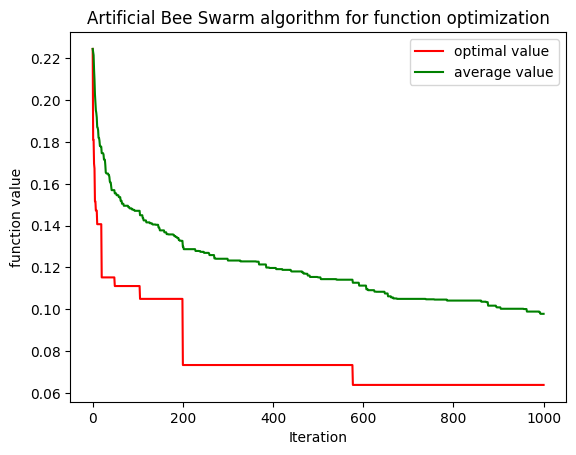

Running time: 168.08496522903442 seconds


In [15]:
# Fitness function (objective function)
def fitness(Bin,AllItem,ran):
    # ran is the packing order.
    itemNum=AllItem.shape[0] 
    BinNum=1;
    RPNXY=[];
    flagItem=np.zeros(itemNum) #Marking whether items are loaded into bin
    utilization_rates = []  
    visualizations = [] 
    
    # Start packing.
    for i in range(itemNum):
        if flagItem[ran[i]]==0:
            item=AllItem[ran[i],:]
            itemRP=Bin  
            flagOL=overlap(item,AllItem,itemRP,RPNXY) 
            if flagOL==0:
                itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                if len(itemRP)>0:
                    RPNXY.append([ran[i],itemRP[0],itemRP[1]])
                    flagItem[ran[i]]=1
    rect_area = 0
    bin_area = Bin[0]*Bin[1]
    for id in RPNXY:
        width,height = AllItem[id[0]]
        rect_area += width*height
    score = rect_area/bin_area
    print('utilisation:{}'.format(score))
    return score

#             #可视化
#             fig, ax = plt.subplots(1, 1)
#             ax1 = fig.gca()
#             for i in RPNXY:
#                 width,height = AllItem[i[0]]
#                 rx,ry = i[1],i[2]
#                 lx,ly = rx-width,ry-height
#                 plt.xlim((0, Bin[0]))
#                 plt.ylim((0, Bin[1]))
#                 color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                 rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
#                 ax1.add_patch(rect)
#             print("利用率: {}".format(utilization_rate))
#             plt.show()
#             #plt.savefig('result.png')
#     print("平均利用率: {}".format(np.mean(utilization_rates)))
            
#     if list(flagItem).count(0)<=0:
#         print("--------------------------------------物品装完---------------------------------\n")
    return score
 
class ABSIndividual:
    def __init__(self,bin,item):
        self.score = 0.
        self.invalidCount = 0 #Number of invalid counts (cumulative number of times results have not been updated)
        self.bin = bin  #Box width and height
        self.allitem = item
        self.ran =  list(range(self.allitem.shape[0]))
        self.calculateFitness()        
 
    def calculateFitness(self):
        self.score = fitness(self.bin,self.allitem,self.ran)#Calculate current score
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount,Bin, item, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount#Number of nectar sources, equal to the number of employed bees
        self.onlookerCount = onlookerCount#Number of onlooker bees 
        self.item = item #Upper and lower bounds for each parameter
        self.maxIterCount = maxIterCount
        self.maxInvalidCount = maxInvalidCount
        self.Bin = Bin
        #The #foodList is a list of foodCount individual bees (i.e., hired bees), each representing a solution with a different packing order.
        self.foodList = [ABSIndividual(self.Bin,self.item) for k in range(self.foodCount)]   #Initialise each nectar source
        #The foodScore is a list storing the best fitness value (score) achieved by each individual bee.
        self.foodScore = [d.score for d in self.foodList]                             #Best results by nectar source
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                      #The best nectar source in the whole world
    
    #Find a suitable permutation
    def updateFood(self, i):  #Update the ith nectar source
        vi = copy.deepcopy(self.foodList[i])
        order =list(range(vi.allitem.shape[0]))
        random.shuffle(order) #Randomly generated pack sequence
        vi.ran = order
        vi.calculateFitness()
        if vi.score > self.foodList[i].score: #If the results are better than the current honey source
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:#If grades are better than history grades
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:#If the results are globally optimal
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    # Implementation of the employed Bees phase
    def employedBeePhase(self):
        for i in range(0, self.foodCount):#Each nectar source is updated in turn
            self.updateFood(i)            
 
    #Implementation of the onlooker bee phase
    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)    
        #Relative scores and index numbers were obtained for each nectar source.
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]
        for k in range(0, self.onlookerCount):
            #Randomly selected from nectar sources with relative scores greater than the randomisation threshold to follow the
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()])
            self.updateFood(i)
 
    #Implementation of the scout bee phase
    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            #If this nectar has not been updated more than the specified threshold, it is reinitialised
            if self.foodList[i].invalidCount > self.maxInvalidCount:
                self.foodList[i] = ABSIndividual(self.Bin, self.item)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)
 
    #Perform a fixed number of iterations
    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
        print("Optimal utilisation:",self.bestFood.score)
        self.printResult(np.array(trace))
 
    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot(x, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        plt.plot(x, [(1-d)/d for d in trace[:, 1]], 'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()
 

if __name__ == "__main__":
    random.seed()
    iternum = 1000
    maxInvalidCount = 50
    abs = ArtificialBeeSwarm(30, 30, Bin, AllItem, iternum, maxInvalidCount)
    start_time = time.time()
    abs.solve()
    end_time = time.time()
    print("Running time: {} seconds".format(end_time - start_time))